# HOMEWORK 2
### Musie Meressa
### Maria Luisa Croci
### Vickranth Ale

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro
from scipy import stats
import scipy

import folium
import os
import json

In [2]:
# read the datasets from csv and Merge the two csv files and store the data into new df

Lookup = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/taxi_zone_lookup.csv")

In [3]:
#january
yellowTaxi1 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-01.csv")
df1 = pd.merge(yellowTaxi1, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1)
del(yellowTaxi1)

In [4]:
#february
yellowTaxi2 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-02.csv")
df2 = pd.merge(yellowTaxi2, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
del yellowTaxi2

In [5]:
#march
yellowTaxi3 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-03.csv")
df3 = pd.merge(yellowTaxi3, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
del yellowTaxi3

In [6]:
#april
yellowTaxi4 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-04.csv")
df4 = pd.merge(yellowTaxi4, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
del yellowTaxi4

In [7]:
#may
yellowTaxi5 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-05.csv")
df5 = pd.merge(yellowTaxi5, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
del yellowTaxi5

In [8]:
#june
yellowTaxi6 = pd.read_csv("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/yellow_tripdata_2018-06.csv")
df6 = pd.merge(yellowTaxi6, Lookup, left_on = "PULocationID", right_on = "LocationID").drop("LocationID", axis = 1) 
del yellowTaxi6

For each month we will take a look on the summaries and "clean" our datasets from the following outliers that represent a small percentage, so removing them we don't risk to change too much our analysis:

- Since in taxi information there is written that the initial charge is 2.50 Dollars, we have to remove what is less than it. Morover we are considering only fare amount that are not bigger than 100 because the are unlikely.
- The variable "passenger_count" is filtered in order to have only values from 1 up to 6.
- Trips with distance less or equal to 0 are removed, even if a good approach is to estimate the averange distance based on the total amount of the payment, but this requires too much time, so for make easier our analys we decide to remove them.
- The "Unknown" boroughs are removed.
- We clean the dates in the pick up and in the drop off from dates that are not for the month object concerned and/or for the year 2018.
- Trips with a negative or zero duration are removed.

After have filtered the datasets we create 6 new dataframes per month, one for each borough (Manhattan, Brooklyn, Bronx, Queen, Staten Island and EWR).

We will base our analysis on the pick up, not on the drop off.

# RQ1

## JANUARY


In [9]:
# constraints on "fare_amount"
df1 = df1[(df1.fare_amount >= 2.5) & (df1.fare_amount < 100)] 

# constraints on "passenger_count"
df1 = df1[(df1.passenger_count >= 1) & (df1.passenger_count < 7)] 


# constraints on "trip_distance"
df1 = df1[df1.trip_distance > 0] 

# constraints on "Borough"
df1 = df1[df1.Borough != "Unknown"]

#Since we receveing the following error "A value is trying to be set on a copy of a slice from a DataFrame." we create a copy of df1
df1 = df1.copy() 

# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
# convert the object type into datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1["tpep_dropoff_datetime"] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# create three new column with the date, time and the hour (the last one it will be needed for RQ2)
df1['date_pickup'] = df1['tpep_pickup_datetime'].dt.date
df1['time_pickup'] = df1['tpep_pickup_datetime'].dt.time
df1['hour_pickup'] = df1['tpep_pickup_datetime'].dt.hour

df1['date_droppff'] = df1['tpep_dropoff_datetime'].dt.date
df1['time_dropoff'] = df1['tpep_dropoff_datetime'].dt.time
df1['hour_dropoff'] = df1['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in january 2018
df1 = df1[df1.tpep_pickup_datetime.between("2018-01-01", "2018-01-31")] 
df1 = df1[df1.tpep_dropoff_datetime.between("2018-01-01", "2018-01-31")] 

#this means we care ONLY about trips that start
#from the midnight of first january until drop off of 23.59 of 31st january

#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df1['trip_duration'] = (df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime).dt.total_seconds()
df1 = df1[df1.trip_duration > 0]


#let's extract the data for each borough for january
ManhattanDf1 = df1[df1['Borough'] == 'Manhattan'] 
BrooklynDf1 = df1[df1['Borough'] == 'Brooklyn']
QueensDf1 = df1[df1['Borough'] == 'Queens']
BronxDf1 = df1[df1['Borough'] == 'Bronx']
StatenDf1 = df1[df1['Borough'] == 'Staten Island']
EwrDf1 = df1[df1['Borough'] == 'EWR']


#now let's check the average trip for each borough per january
av1_man = (ManhattanDf1['date_pickup'].value_counts()).mean()
av1_que = (QueensDf1['date_pickup'].value_counts()).mean()
av1_brook = (BrooklynDf1['date_pickup'].value_counts()).mean()
av1_bronx = (BronxDf1['date_pickup'].value_counts()).mean()
av1_si = (StatenDf1['date_pickup'].value_counts()).mean()
av1_ewr = (EwrDf1['date_pickup'].value_counts()).mean()


## create a df with average of january per borough
av1 = {"month": ["January", "January", "January", "January", "January", "January"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av1_man, av1_brook, av1_que, av1_bronx, av1_si, av1_ewr]}
av1 = pd.DataFrame(data = av1)

## FEBRUARY

In [10]:
# constraints on "fare_amount"
df2 = df2[(df2.fare_amount >= 2.5) & (df2.fare_amount < 100)] 


# constraints on "passenger_count"
df2 = df2[(df2.passenger_count >= 1) & (df2.passenger_count < 7)] 


# constraints on "trip_distance"
df2 = df2[df2.trip_distance > 0] 


# constraints on "Borough"
df2 = df2[df2.Borough != "Unknown"]

df2 = df2.copy()


# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
#convert the object type into datetime
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2["tpep_dropoff_datetime"] = pd.to_datetime(df2['tpep_dropoff_datetime'])

df2['date_pickup'] = df2['tpep_pickup_datetime'].dt.date
df2['time_pickup'] = df2['tpep_pickup_datetime'].dt.time
df2['hour_pickup'] = df2['tpep_pickup_datetime'].dt.hour

df2['date_droppff'] = df2['tpep_dropoff_datetime'].dt.date
df2['time_dropoff'] = df2['tpep_dropoff_datetime'].dt.time
df2['hour_dropoff'] = df2['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in feb 2018
df2 = df2[df2.tpep_pickup_datetime.between("2018-02-01", "2018-02-28")] 
df2 = df2[df2.tpep_dropoff_datetime.between("2018-02-01", "2018-02-28")] 

#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df2['trip_duration'] = (df2.tpep_dropoff_datetime - df2.tpep_pickup_datetime).dt.total_seconds()
df2 = df2[df2.trip_duration > 0]


#let's extract the data for each borough for february
ManhattanDf2 = df2[df2['Borough'] == 'Manhattan']
BrooklynDf2 = df2[df2['Borough'] == 'Brooklyn']
QueensDf2 = df2[df2['Borough'] == 'Queens']
BronxDf2 = df2[df2['Borough'] == 'Bronx']
StatenDf2 = df2[df2['Borough'] == 'Staten Island']
EwrDf2 = df2[df2['Borough'] == 'EWR']


#now let's check the average trip for each borough per february
av2_man = (ManhattanDf2['date_pickup'].value_counts()).mean()
av2_que = (QueensDf2['date_pickup'].value_counts()).mean()
av2_brook = (BrooklynDf2['date_pickup'].value_counts()).mean()
av2_bronx = (BronxDf2['date_pickup'].value_counts()).mean()
av2_si = (StatenDf2['date_pickup'].value_counts()).mean()
av2_ewr = (EwrDf2['date_pickup'].value_counts()).mean()

## create a df with average of February per borough
av2 = {"month": ["February", "February", "February", "February", "February", "February"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av2_man, av2_brook, av2_que, av2_bronx, av2_si, av2_ewr]}
av2 = pd.DataFrame(data = av2)

## MARCH

In [11]:
# constraints on "fare_amount"
df3 = df3[(df3.fare_amount >= 2.5) & (df3.fare_amount < 100)] 


# constraints on "passenger_count"
df3 = df3[(df3.passenger_count >= 1) & (df3.passenger_count < 7)] 


# constraints on "trip_distance"
df3 = df3[df3.trip_distance != 0] 


# constraints on "Borough"
df3 = df3[df3.Borough != "Unknown"]

df3 = df3.copy()


# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
#convert the object type into datetime
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3["tpep_dropoff_datetime"] = pd.to_datetime(df3['tpep_dropoff_datetime'])

df3['date_pickup'] = df3['tpep_pickup_datetime'].dt.date
df3['time_pickup'] = df3['tpep_pickup_datetime'].dt.time
df3['hour_pickup'] = df3['tpep_pickup_datetime'].dt.hour

df3['date_droppff'] = df3['tpep_dropoff_datetime'].dt.date
df3['time_dropoff'] = df3['tpep_dropoff_datetime'].dt.time
df3['hour_dropoff'] = df3['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in March 2018
df3 = df3[df3.tpep_pickup_datetime.between("2018-03-01", "2018-03-31")] 
df3 = df3[df3.tpep_dropoff_datetime.between("2018-03-01", "2018-03-31")] 


#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df3['trip_duration'] = (df3.tpep_dropoff_datetime - df3.tpep_pickup_datetime).dt.total_seconds()
df3 = df3[df3.trip_duration > 0]


#let's extract the data for each borough for March
ManhattanDf3 = df3[df3['Borough'] == 'Manhattan']
BrooklynDf3 = df3[df3['Borough'] == 'Brooklyn']
QueensDf3 = df3[df3['Borough'] == 'Queens']
BronxDf3 = df3[df3['Borough'] == 'Bronx']
StatenDf3 = df3[df3['Borough'] == 'Staten Island']
EwrDf3 = df3[df3['Borough'] == 'EWR']


#now let's check the average trip for each borough per march
av3_man = (ManhattanDf3['date_pickup'].value_counts()).mean()
av3_que = (QueensDf3['date_pickup'].value_counts()).mean()
av3_brook = (BrooklynDf3['date_pickup'].value_counts()).mean()
av3_bronx = (BronxDf3['date_pickup'].value_counts()).mean()
av3_si = (StatenDf3['date_pickup'].value_counts()).mean()
av3_ewr = (EwrDf3['date_pickup'].value_counts()).mean()

## create a df with average of March per borough
av3 = {"month": ["March", "March", "March", "March", "March", "March"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av3_man, av3_brook, av3_que, av3_bronx, av3_si, av3_ewr]}
av3 = pd.DataFrame(data = av3)

## APRIL

In [12]:
# constraints on "fare_amount"
df4 = df4[(df4.fare_amount >= 2.5) & (df4.fare_amount < 100)] 

# constraints on "passenger_count"
df4 = df4[(df4.passenger_count >= 1) & (df4.passenger_count < 7)] 


# constraints on "trip_distance"
df4 = df4[df4.trip_distance != 0] 


# constraints on "Borough"
df4 = df4[df4.Borough != "Unknown"]


df4 = df4.copy()


# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
#convert the object type into datetime
df4['tpep_pickup_datetime'] = pd.to_datetime(df4['tpep_pickup_datetime'])
df4["tpep_dropoff_datetime"] = pd.to_datetime(df4['tpep_dropoff_datetime'])

# create three new column with the date, time and the hour (the last one it will be needed for RQ2)
df4['date_pickup'] = df4['tpep_pickup_datetime'].dt.date
df4['time_pickup'] = df4['tpep_pickup_datetime'].dt.time
df4['hour_pickup'] = df4['tpep_pickup_datetime'].dt.hour

df4['date_droppff'] = df4['tpep_dropoff_datetime'].dt.date
df4['time_dropoff'] = df4['tpep_dropoff_datetime'].dt.time
df4['hour_dropoff'] = df4['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in April 2018
df4 = df4[df4.tpep_pickup_datetime.between("2018-04-01", "2018-04-30")] 
df4 = df4[df4.tpep_dropoff_datetime.between("2018-04-01", "2018-04-30")] 

#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df4['trip_duration'] = (df4.tpep_dropoff_datetime - df4.tpep_pickup_datetime).dt.total_seconds()
df4 = df4[df4.trip_duration > 0]


#let's extract the data for each borough for April
ManhattanDf4 = df4[df4['Borough'] == 'Manhattan']
BrooklynDf4 = df4[df4['Borough'] == 'Brooklyn']
QueensDf4 = df4[df4['Borough'] == 'Queens']
BronxDf4 = df4[df4['Borough'] == 'Bronx']
StatenDf4 = df4[df4['Borough'] == 'Staten Island']
EwrDf4 = df4[df4['Borough'] == 'EWR']


#now let's check the average trip for each borough per april
av4_man = (ManhattanDf4['date_pickup'].value_counts()).mean()
av4_que = (QueensDf4['date_pickup'].value_counts()).mean()
av4_brook = (BrooklynDf4['date_pickup'].value_counts()).mean()
av4_bronx = (BronxDf4['date_pickup'].value_counts()).mean()
av4_si = (StatenDf4['date_pickup'].value_counts()).mean()
av4_ewr = (EwrDf4['date_pickup'].value_counts()).mean()

## create a df with average of April per borough
av4 = {"month": ["April", "April", "April", "April", "April", "April"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av4_man, av4_brook, av4_que, av4_bronx, av4_si, av4_ewr]}
av4 = pd.DataFrame(data = av4)


## MAY

In [13]:
# constraints on "fare_amount"
df5 = df5[(df5.fare_amount >= 2.5) & (df5.fare_amount < 100)] 

# constraints on "passenger_count"
df5 = df5[(df5.passenger_count >= 1) & (df5.passenger_count < 7)] 


# constraints on "trip_distance"
df5 = df5[df5.trip_distance != 0] 


# constraints on "Borough"

df5 = df5[df5.Borough != "Unknown"]

df5 = df5.copy()


# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
#convert the object type into datetime
df5['tpep_pickup_datetime'] = pd.to_datetime(df5['tpep_pickup_datetime'])
df5["tpep_dropoff_datetime"] = pd.to_datetime(df5['tpep_dropoff_datetime'])

# create three new column with the date, time and the hour (the last one it will be needed for RQ2)
df5['date_pickup'] = df5['tpep_pickup_datetime'].dt.date
df5['time_pickup'] = df5['tpep_pickup_datetime'].dt.time
df5['hour_pickup'] = df5['tpep_pickup_datetime'].dt.hour

df5['date_droppff'] = df5['tpep_dropoff_datetime'].dt.date
df5['time_dropoff'] = df5['tpep_dropoff_datetime'].dt.time
df5['hour_dropoff'] = df5['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in may 2018
df5 = df5[df5.tpep_pickup_datetime.between("2018-05-01", "2018-05-31")] 
df5 = df5[df5.tpep_dropoff_datetime.between("2018-05-01", "2018-05-31")] 


#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df5['trip_duration'] = (df5.tpep_dropoff_datetime - df5.tpep_pickup_datetime).dt.total_seconds()
df5 = df5[df5.trip_duration > 0]


#let's extract the data for each borough for May
ManhattanDf5 = df5[df5['Borough'] == 'Manhattan']
BrooklynDf5 = df5[df5['Borough'] == 'Brooklyn']
QueensDf5 = df5[df5['Borough'] == 'Queens']
BronxDf5 = df5[df5['Borough'] == 'Bronx']
StatenDf5 = df5[df5['Borough'] == 'Staten Island']
EwrDf5 = df5[df5['Borough'] == 'EWR']


#now let's check the average trip for each borough per May
av5_man = (ManhattanDf5['date_pickup'].value_counts()).mean()
av5_que = (QueensDf5['date_pickup'].value_counts()).mean()
av5_brook = (BrooklynDf5['date_pickup'].value_counts()).mean()
av5_bronx = (BronxDf5['date_pickup'].value_counts()).mean()
av5_si = (StatenDf5['date_pickup'].value_counts()).mean()
av5_ewr = (EwrDf5['date_pickup'].value_counts()).mean()

## create a df with average of May per borough
av5 = {"month": ["May", "May", "May", "May", "May", "May"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av5_man, av5_brook, av5_que, av5_bronx, av5_si, av5_ewr]}
av5 = pd.DataFrame(data = av5)


## JUNE

In [14]:
# constraints on "fare_amount"
df6 = df6[(df6.fare_amount >= 2.5) & (df6.fare_amount < 100)] 


# constraints on "passenger_count"
df6 = df6[(df6.passenger_count >= 1) & (df6.passenger_count < 7)] 


# constraints on "trip_distance"
df6 = df6[df6.trip_distance != 0] 


# constraints on "Borough"
df6 = df6[df6.Borough != "Unknown"]

df6 = df6.copy()


# constraints on "tpep_pickup_datetime" and "tpep_dropoff_datetime"
#convert the object type into datetime
df6['tpep_pickup_datetime'] = pd.to_datetime(df6['tpep_pickup_datetime'])
df6["tpep_dropoff_datetime"] = pd.to_datetime(df6['tpep_dropoff_datetime'])

# create three new column with the date, time and the hour (the last one it will be needed for RQ2)
df6['date_pickup'] = df6['tpep_pickup_datetime'].dt.date
df6['time_pickup'] = df6['tpep_pickup_datetime'].dt.time
df6['hour_pickup'] = df6['tpep_pickup_datetime'].dt.hour

df6['date_droppff'] = df6['tpep_dropoff_datetime'].dt.date
df6['time_dropoff'] = df6['tpep_dropoff_datetime'].dt.time
df6['hour_dropoff'] = df6['tpep_dropoff_datetime'].dt.hour


#easier way to delete what is not in june 2018
df6 = df6[df6.tpep_pickup_datetime.between("2018-06-01", "2018-06-30")] 
df6 = df6[df6.tpep_dropoff_datetime.between("2018-06-01", "2018-06-30")] 

#constraints on the duration of the trip (needed for RQ3)
#we first create a new column called trip duration and then we remove the negative durations
df6['trip_duration'] = (df6.tpep_dropoff_datetime - df6.tpep_pickup_datetime).dt.total_seconds()
df6 = df6[df6.trip_duration > 0]



#let's extract the data for each borough for June
ManhattanDf6 = df6[df6['Borough'] == 'Manhattan']
BrooklynDf6 = df6[df6['Borough'] == 'Brooklyn']
QueensDf6 = df6[df6['Borough'] == 'Queens']
BronxDf6 = df6[df6['Borough'] == 'Bronx']
StatenDf6 = df6[df6['Borough'] == 'Staten Island']
EwrDf6 = df6[df6['Borough'] == 'EWR']


#now let's check the average trip for each borough per June
av6_man = (ManhattanDf6['date_pickup'].value_counts()).mean()
av6_que = (QueensDf6['date_pickup'].value_counts()).mean()
av6_brook = (BrooklynDf6['date_pickup'].value_counts()).mean()
av6_bronx = (BronxDf6['date_pickup'].value_counts()).mean()
av6_si = (StatenDf6['date_pickup'].value_counts()).mean()
av6_ewr = (EwrDf6['date_pickup'].value_counts()).mean()

## create a df with average of June per borough
av6 = {"month": ["June", "June", "June", "June", "June", "June"], "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", "EWR"], "average": [av6_man, av6_brook, av6_que, av6_bronx, av6_si, av6_ewr]}
av6 = pd.DataFrame(data = av6)



In [15]:
#now we create a df with the average for each month and borough

frames = [av1, av2, av3, av4, av5, av6]
av = pd.concat(frames)
av

,month,borough,average
0,January,Manhattan,252917.333333
1,January,Brooklyn,3150.133333
2,January,Queens,16429.466667
3,January,Bronx,212.633333
4,January,Staten Island,3.586207
5,January,EWR,4.172414
0,February,Manhattan,274028.518519
1,February,Brooklyn,3305.629630
2,February,Queens,16611.370370
3,February,Bronx,205.888889


Text(0.5,20.8,'Month')

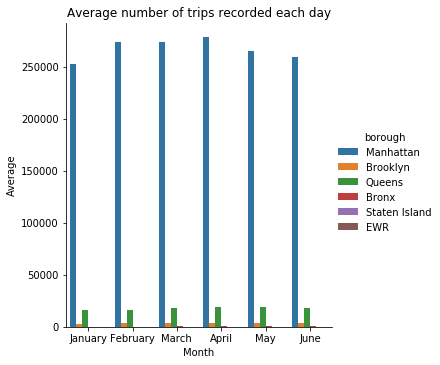

In [16]:
sns.catplot(x = "month", y = "average", hue = "borough", data=av, kind="bar")
plt.title("Average number of trips recorded each day")
plt.ylabel('Average')
plt.xlabel('Month')

New York's taxis are operated mainly by two different types of taxis: the yellow cabs and the boro taxis.
The yellow cabs run from Manhattan to the other boroughs, instead the green cabs (also called boro taxis) runs from Harlem (Upper Manhattan), Brooklyn, Bronx, Queens (not the airports) and Staten Island to the entire Manhattan. Obviously there could be few exeptions (or outliers) as we will see in our analysis. Morover, since the data set represents the runs for the yellow cabs, and according to what it has been just explained, the outcomes of our analysis and the outcomes for Manhattan have the same trend as regard the pick up. So we can claim that analyse the pick up for the other boroughs doesn't give us some additional and effective information, but on the contrary it is meaningless.

However from our analysis April represents the month with more trips in Manhattan (around 278130 each day), even if it can be observed a steady trend for all the six months. Since the other boroughs are in minority the following chart shows the trend for the other boroughs.

In [17]:
#average runs per day in April in manhattan
av4_man

278130.3448275862

Text(0.5,20.8,'Month')

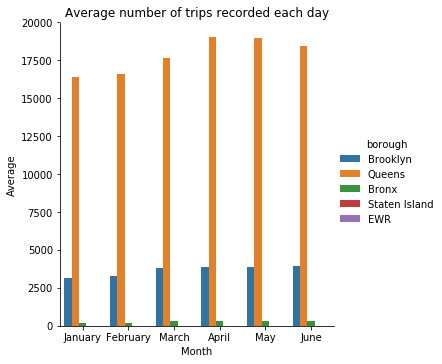

In [18]:
avX = av[av.borough != "Manhattan"]

sns.catplot(x = "month", y = "average", hue = "borough", data=avX, kind="bar")
plt.title("Average number of trips recorded each day")
plt.ylabel('Average')
plt.xlabel('Month')

In Queens April is the month with more trips each day (19028), meanwhile in Brooklyn the month with an higher average is June (3965).

In [19]:
#average runs per day in april in queens
print(av4_que)

#average runs per day in june in brooklyn
print(av6_brook)

19028.58620689655
3965.9310344827586


Text(0.5,20.8,'Month')

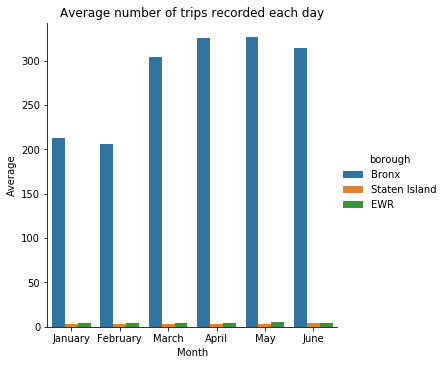

In [20]:
avY = avX[(avX.borough != "Queens") & (avX.borough != "Brooklyn")]

sns.catplot(x = "month", y = "average", hue = "borough", data=avY, kind="bar")
plt.title("Average number of trips recorded each day")
plt.ylabel('Average')
plt.xlabel('Month')

In [21]:
print(av5_bronx)

326.06666666666666


In Bronx we have in May the maximum average, instead for Staten Island and EWR the averages are very low, less then 10.

# RQ2

The goal of the following code is to create a final dataframe that contain information about total number of passenger per each month in each slot in order to plot at the end each borough with all the months. 
We consider slots of an hour, it means we will have 24 time slots as:
- 0: runs from 00:00 to 00:59
- 1: runs from 01:00 to 01:59
- etc...
- 23: runs from 23:00 to 23:59

## JANUARY

In [22]:
#New York
group1 = df1.groupby('hour_pickup').passenger_count.count()
group1_df = pd.DataFrame(group1)
group1_df["Month"] = ("January")
group1_df["Hour"] = group1_df.index
group1_df.head()

,passenger_count,Month,Hour
hour_pickup,,,
0,245106,January,0
1,179071,January,1
2,135262,January,2
3,97558,January,3
4,74627,January,4


In [23]:
# Manhattan
group1_man = ManhattanDf1.groupby('hour_pickup').passenger_count.count()
group1_man_df = pd.DataFrame(group1_man)
group1_man_df["Month"] = ("January")
group1_man_df["Hour"] = group1_man_df.index

#Brooklyn
group1_brooklyn = BrooklynDf1.groupby('hour_pickup').passenger_count.count()
group1_brooklyn_df = pd.DataFrame(group1_brooklyn)
group1_brooklyn_df["Month"] = ("January")
group1_brooklyn_df["Hour"] = group1_brooklyn_df.index

#Bronx
group1_bronx = BronxDf1.groupby('hour_pickup').passenger_count.count()
group1_bronx_df = pd.DataFrame(group1_bronx)
group1_bronx_df["Month"] = ("January")
group1_bronx_df["Hour"] = group1_bronx_df.index

#Queens
group1_queens = QueensDf1.groupby('hour_pickup').passenger_count.count()
group1_queens_df = pd.DataFrame(group1_queens)
group1_queens_df["Month"] = ("January")
group1_queens_df["Hour"] = group1_queens_df.index

#Staten Island
group1_si = StatenDf1.groupby('hour_pickup').passenger_count.count()
group1_si_df = pd.DataFrame(group1_si)
group1_si_df["Month"] = ("January")
group1_si_df["Hour"] = group1_si_df.index

#EWR
group1_ewr = EwrDf1.groupby('hour_pickup').passenger_count.count()
group1_ewr_df = pd.DataFrame(group1_ewr)
group1_ewr_df["Month"] = ("January")
group1_ewr_df["Hour"] = group1_ewr_df.index

## FEBRUARY

In [24]:
#New York
group2 = df2.groupby('hour_pickup').passenger_count.count()
group2_df = pd.DataFrame(group2)
group2_df["Month"] = ("February")
group2_df["Hour"] = group2_df.index

# Manhattan
group2_man = ManhattanDf2.groupby('hour_pickup').passenger_count.count()
group2_man_df = pd.DataFrame(group2_man)
group2_man_df["Month"] = ("February")
group2_man_df["Hour"] = group2_man_df.index

#Brooklyn
group2_brooklyn = BrooklynDf2.groupby('hour_pickup').passenger_count.count()
group2_brooklyn_df = pd.DataFrame(group2_brooklyn)
group2_brooklyn_df["Month"] = ("February")
group2_brooklyn_df["Hour"] = group2_brooklyn_df.index

#Bronx
group2_bronx = BronxDf2.groupby('hour_pickup').passenger_count.count()
group2_bronx_df = pd.DataFrame(group2_bronx)
group2_bronx_df["Month"] = ("February")
group2_bronx_df["Hour"] = group2_bronx_df.index

#Queens
group2_queens = QueensDf2.groupby('hour_pickup').passenger_count.count()
group2_queens_df = pd.DataFrame(group2_queens)
group2_queens_df["Month"] = ("February")
group2_queens_df["Hour"] = group2_queens_df.index

# Staten Island
group2_si = StatenDf2.groupby('hour_pickup').passenger_count.count()
group2_si_df = pd.DataFrame(group2_si)
group2_si_df["Month"] = ("February")
group2_si_df["Hour"] = group2_si_df.index

#EWR
group2_ewr = EwrDf2.groupby('hour_pickup').passenger_count.count()
group2_ewr_df = pd.DataFrame(group2_ewr)
group2_ewr_df["Month"] = ("February")
group2_ewr_df["Hour"] = group2_ewr_df.index

## MARCH

In [25]:
# New York
group3 = df3.groupby('hour_pickup').passenger_count.count()
group3_df = pd.DataFrame(group3)
group3_df["Month"] = ("March")
group3_df["Hour"] = group3_df.index

#Manhattan
group3_man = ManhattanDf3.groupby('hour_pickup').passenger_count.count()
group3_man_df = pd.DataFrame(group3_man)
group3_man_df["Month"] = ("March")
group3_man_df["Hour"] = group3_man_df.index

#Brooklyn
group3_brooklyn = BrooklynDf3.groupby('hour_pickup').passenger_count.count()
group3_brooklyn_df = pd.DataFrame(group3_brooklyn)
group3_brooklyn_df["Month"] = ("March")
group3_brooklyn_df["Hour"] = group3_brooklyn_df.index

#Bronx
group3_bronx = BronxDf3.groupby('hour_pickup').passenger_count.count()
group3_bronx_df = pd.DataFrame(group3_bronx)
group3_bronx_df["Month"] = ("March")
group3_bronx_df["Hour"] = group3_bronx_df.index

#Queens
group3_queens = QueensDf3.groupby('hour_pickup').passenger_count.count()
group3_queens_df = pd.DataFrame(group3_queens)
group3_queens_df["Month"] = ("March")
group3_queens_df["Hour"] = group3_queens_df.index

#Staten Island
group3_si = StatenDf3.groupby('hour_pickup').passenger_count.count()
group3_si_df = pd.DataFrame(group3_si)
group3_si_df["Month"] = ("March")
group3_si_df["Hour"] = group3_si_df.index

#EWR
group3_ewr = EwrDf3.groupby('hour_pickup').passenger_count.count()
group3_ewr_df = pd.DataFrame(group3_ewr)
group3_ewr_df["Month"] = ("March")
group3_ewr_df["Hour"] = group3_ewr_df.index

## APRIL

In [26]:
# New York
group4 = df4.groupby('hour_pickup').passenger_count.count()
group4_df = pd.DataFrame(group4)
group4_df["Month"] = ("April")
group4_df["Hour"] = group4_df.index

#Manhattan
group4_man = ManhattanDf4.groupby('hour_pickup').passenger_count.count()
group4_man_df = pd.DataFrame(group4_man)
group4_man_df["Month"] = ("April")
group4_man_df["Hour"] = group4_man_df.index

#Brooklyn
group4_brooklyn = BrooklynDf4.groupby('hour_pickup').passenger_count.count()
group4_brooklyn_df = pd.DataFrame(group4_brooklyn)
group4_brooklyn_df["Month"] = ("April")
group4_brooklyn_df["Hour"] = group4_brooklyn_df.index

#Bronx
group4_bronx = BronxDf4.groupby('hour_pickup').passenger_count.count()
group4_bronx_df = pd.DataFrame(group4_bronx)
group4_bronx_df["Month"] = ("April")
group4_bronx_df["Hour"] = group4_bronx_df.index

#Queens
group4_queens = QueensDf4.groupby('hour_pickup').passenger_count.count()
group4_queens_df = pd.DataFrame(group4_queens)
group4_queens_df["Month"] = ("April")
group4_queens_df["Hour"] = group4_queens_df.index

#Staten Island
group4_si = StatenDf4.groupby('hour_pickup').passenger_count.count()
group4_si_df = pd.DataFrame(group4_si)
group4_si_df["Month"] = ("April")
group4_si_df["Hour"] = group4_si_df.index

#EWR
group4_ewr = EwrDf4.groupby('hour_pickup').passenger_count.count()
group4_ewr_df = pd.DataFrame(group4_ewr)
group4_ewr_df["Month"] = ("April")
group4_ewr_df["Hour"] = group4_ewr_df.index

## MAY

In [27]:
# New York
group5 = df5.groupby('hour_pickup').passenger_count.count()
group5_df = pd.DataFrame(group3)
group5_df["Month"] = ("May")
group5_df["Hour"] = group5_df.index

#Manhattan
group5_man = ManhattanDf5.groupby('hour_pickup').passenger_count.count()
group5_man_df = pd.DataFrame(group5_man)
group5_man_df["Month"] = ("May")
group5_man_df["Hour"] = group5_man_df.index

#Brooklyn
group5_brooklyn = BrooklynDf5.groupby('hour_pickup').passenger_count.count()
group5_brooklyn_df = pd.DataFrame(group5_brooklyn)
group5_brooklyn_df["Month"] = ("May")
group5_brooklyn_df["Hour"] = group5_brooklyn_df.index

#Bronx
group5_bronx = BronxDf5.groupby('hour_pickup').passenger_count.count()
group5_bronx_df = pd.DataFrame(group5_bronx)
group5_bronx_df["Month"] = ("May")
group5_bronx_df["Hour"] = group5_bronx_df.index

#Queens
group5_queens = QueensDf5.groupby('hour_pickup').passenger_count.count()
group5_queens_df = pd.DataFrame(group5_queens)
group5_queens_df["Month"] = ("May")
group5_queens_df["Hour"] = group5_queens_df.index

#Staten Island 
group5_si = StatenDf5.groupby('hour_pickup').passenger_count.count()
group5_si_df = pd.DataFrame(group5_si)
group5_si_df["Month"] = ("May")
group5_si_df["Hour"] = group5_si_df.index

#EWR
group5_ewr = EwrDf5.groupby('hour_pickup').passenger_count.count()
group5_ewr_df = pd.DataFrame(group5_ewr)
group5_ewr_df["Month"] = ("May")
group5_ewr_df["Hour"] = group5_ewr_df.index


## JUNE

In [28]:
#New York
group6 = df6.groupby('hour_pickup').passenger_count.count()
group6_df = pd.DataFrame(group6)
group6_df["Month"] = ("June")
group6_df["Hour"] = group6_df.index

#Manhattan
group6_man = ManhattanDf6.groupby('hour_pickup').passenger_count.count()
group6_man_df = pd.DataFrame(group6_man)
group6_man_df["Month"] = ("June")
group6_man_df["Hour"] = group6_man_df.index

#Brooklyn
group6_brooklyn = BrooklynDf6.groupby('hour_pickup').passenger_count.count()
group6_brooklyn_df = pd.DataFrame(group6_brooklyn)
group6_brooklyn_df["Month"] = ("June")
group6_brooklyn_df["Hour"] = group6_brooklyn_df.index

#Bronx
group6_bronx = BronxDf6.groupby('hour_pickup').passenger_count.count()
group6_bronx_df = pd.DataFrame(group6_bronx)
group6_bronx_df["Month"] = ("June")
group6_bronx_df["Hour"] = group6_bronx_df.index

#Queens
group6_queens = QueensDf6.groupby('hour_pickup').passenger_count.count()
group6_queens_df = pd.DataFrame(group6_queens)
group6_queens_df["Month"] = ("June")
group6_queens_df["Hour"] = group6_queens_df.index

#Staten Island
group6_si = StatenDf6.groupby('hour_pickup').passenger_count.count()
group6_si_df = pd.DataFrame(group6_si)
group6_si_df["Month"] = ("June")
group6_si_df["Hour"] = group6_si_df.index

#EWR
group6_ewr = EwrDf6.groupby('hour_pickup').passenger_count.count()
group6_ewr_df = pd.DataFrame(group6_ewr)
group6_ewr_df["Month"] = ("June")
group6_ewr_df["Hour"] = group6_ewr_df.index

Text(36.8698,0.5,'Number of Passenger')

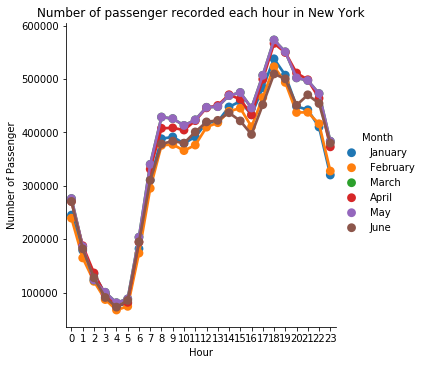

In [29]:
#Trend in NY
con_ny = [group1_df, group2_df, group3_df, group4_df, group5_df, group6_df]
group_ny = pd.concat(con_ny)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_ny, kind = "point" )
plt.title("Number of passenger recorded each hour in New York")
plt.ylabel('Number of Passenger')


Text(36.8698,0.5,'Number of Passenger')

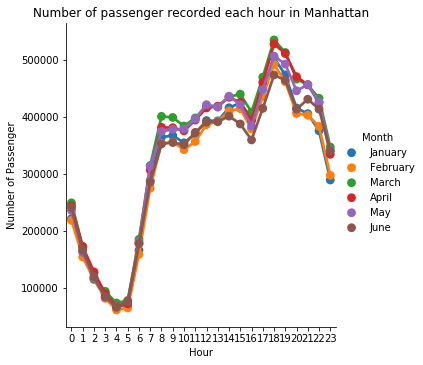

In [30]:
#Trend in Manhattan
con_man = [group1_man_df, group2_man_df, group3_man_df, group4_man_df, group5_man_df, group6_man_df]
group_man = pd.concat(con_man)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_man, kind = "point" )
plt.title("Number of passenger recorded each hour in Manhattan")
plt.ylabel('Number of Passenger')

Once again it can be seen that the rend for Manhattan is quite representative for all New York. In general, for all the months the time slot with more passenger is from 18-19.

Text(35.4679,0.5,'Number of Passenger')

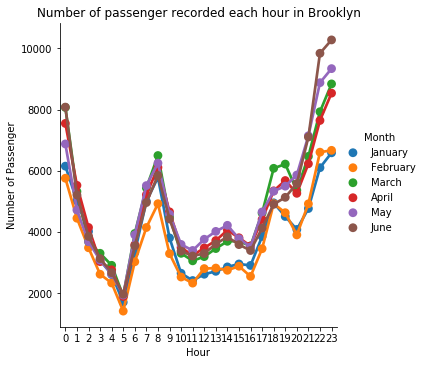

In [31]:
#Trend in Brooklyn
con_brooklyn = [group1_brooklyn_df, group2_brooklyn_df, group3_brooklyn_df, group4_brooklyn_df, group5_brooklyn_df, group6_brooklyn_df]
group_brooklyn = pd.concat(con_brooklyn)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_brooklyn, kind = "point" )
plt.title("Number of passenger recorded each hour in Brooklyn")
plt.ylabel('Number of Passenger')

In Brooklyn generally the time slot with more passenger is in at 23, even if in January and February there is a considerable decrese.

Text(35.4959,0.5,'Number of Passenger')

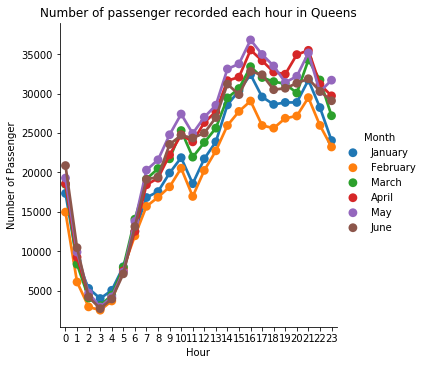

In [32]:
#Trend in Queens
con_queens = [group1_queens_df, group2_queens_df, group3_queens_df, group4_queens_df, group5_queens_df, group6_queens_df]
group_queens = pd.concat(con_queens)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_queens, kind = "point" )
plt.title("Number of passenger recorded each hour in Queens")
plt.ylabel('Number of Passenger')

In Queens it can be seen a pick at 16 in the evening. The pick is constant for the all months, but generally the amount is similar also at 21.

Text(32.6641,0.5,'Number of Passenger')

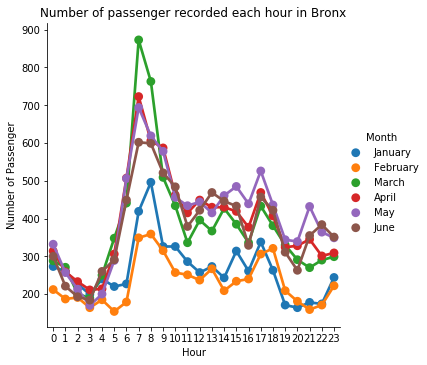

In [33]:
#Trend in Bronx
con_bronx = [group1_bronx_df, group2_bronx_df, group3_bronx_df, group4_bronx_df, group5_bronx_df, group6_bronx_df]
group_bronx = pd.concat(con_bronx)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_bronx, kind = "point" )
plt.title("Number of passenger recorded each hour in Bronx")
plt.ylabel('Number of Passenger')

The slot with more total amount of passenger in Bronx is at 7 and 8 in the morning.

Text(31.2902,0.5,'Number of Passenger')

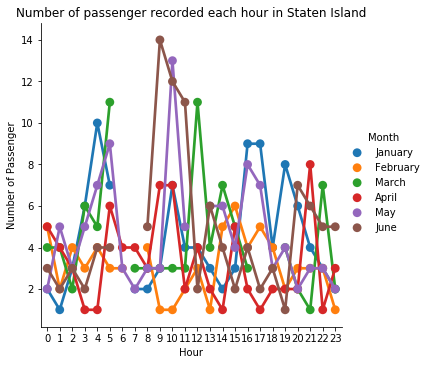

In [34]:
#Trend in Staten Island
con_si = [group1_si_df, group2_si_df, group3_si_df, group4_si_df, group5_si_df, group6_si_df]
group_si = pd.concat(con_si)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_si, kind = "point" )
plt.title("Number of passenger recorded each hour in Staten Island")
plt.ylabel('Number of Passenger')

Text(31.2902,0.5,'Number of Passenger')

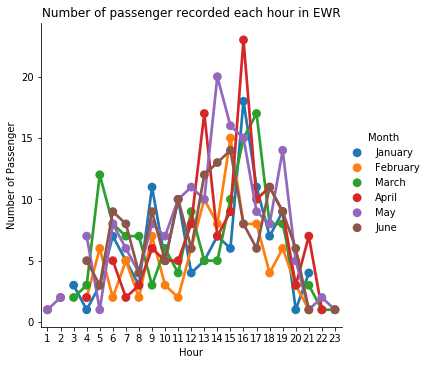

In [35]:
#Trend in EWR
con_ewr = [group1_ewr_df, group2_ewr_df, group3_ewr_df, group4_ewr_df, group5_ewr_df, group6_ewr_df]
group_ewr = pd.concat(con_ewr)
sns.catplot(x = "Hour", y ="passenger_count", hue="Month", data = group_ewr, kind = "point" )
plt.title("Number of passenger recorded each hour in EWR")
plt.ylabel('Number of Passenger')

Since Staten Island and EWR are outliers, the trend is unstable.
Furthermore, Staten Island is an island located at the south of Lower Manhattan, and even if they are really close they are connected through a bridge with Brooklyn that in turns is connected with another bridge. So obviously it requires too much time and fees, infact New York has established a ferry boat that pick up from Battery Park in lower Manhattan and drop off in Staten Island (and vice versa) each 15 or 20 minutes and it works 24h a day. In addition it is always totally free. Clearly it's very rare that a person use a yellow cab from and to Staten Island.

# RQ3

## JANUARY

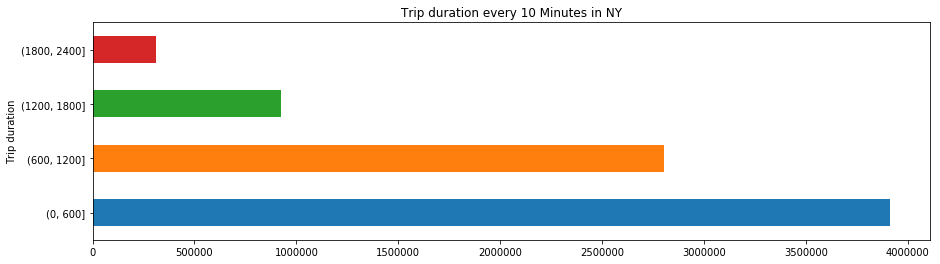

In [36]:
plt.figure(figsize = (15,4))
df1.trip_duration.groupby(pd.cut(df1.trip_duration, np.arange(0,3000,600))).count().plot(kind='barh')
plt.title("Trip duration every 10 Minutes in NY")
plt.ylabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


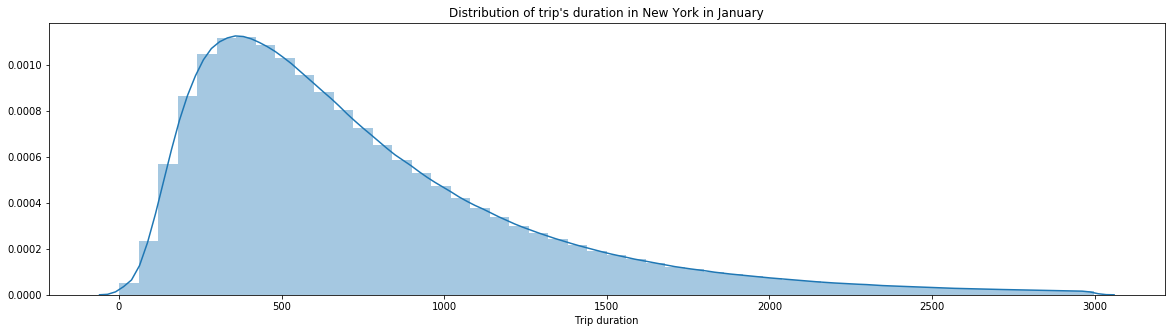

In [37]:
x1 = df1[df1.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x1["trip_duration"])
plt.title("Distribution of trip's duration in New York in January")
plt.xlabel('Trip duration')
plt.show()

As we can see from our outcomes the trip duration is distribuited as a particular Gamma distribution, that is the Chi-squared, so it means we have a lot of trip with a short duration and a few trip with a longer duration. 

Now let's see what happened for each borough.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


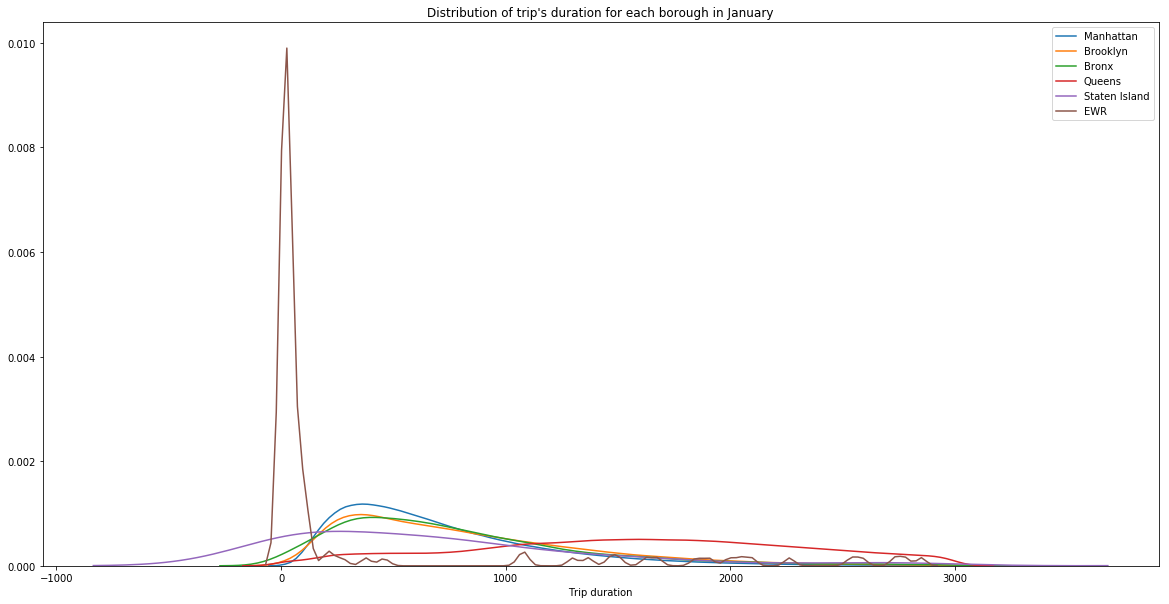

In [38]:
x1_man = ManhattanDf1[ManhattanDf1.trip_duration < 3000]
x1_brook = BrooklynDf1[BrooklynDf1.trip_duration < 3000]
x1_bronx = BronxDf1[BronxDf1.trip_duration < 3000]
x1_que = QueensDf1[QueensDf1.trip_duration < 3000]
x1_si = StatenDf1[StatenDf1.trip_duration < 3000]
x1_ewr = EwrDf1[EwrDf1.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x1_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x1_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x1_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x1_que["trip_duration"], label = "Queens")
sns.kdeplot(x1_si["trip_duration"], label = "Staten Island")
sns.kdeplot(x1_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in January")
plt.xlabel('Trip duration')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


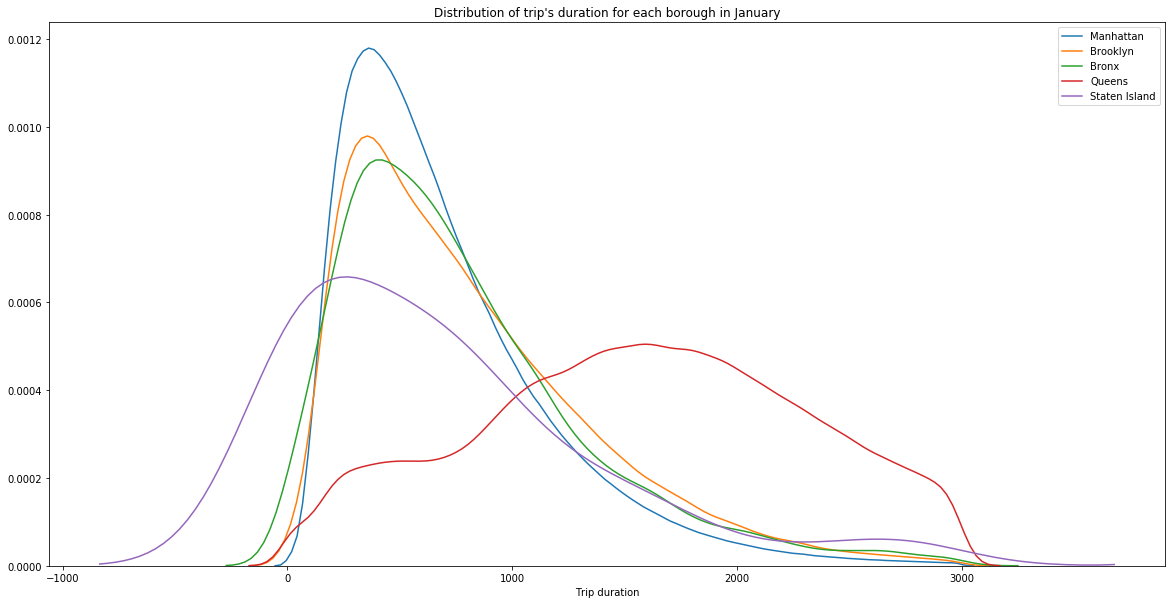

In [39]:
#let's see without the outlier of EWR
plt.figure(figsize = (20,10))
sns.kdeplot(x1_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x1_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x1_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x1_que["trip_duration"], label = "Queens")
sns.kdeplot(x1_si["trip_duration"], label = "Staten Island")

plt.title("Distribution of trip's duration for each borough in January")
plt.xlabel('Trip duration')
plt.show()

The trip's duration in each boroughs, except for Queens and EWR, follow a Chi-squared distribution.

Since we estimate that also in the other month the trend for Queens and EWR will be the same, we decid to skip them from the following plots.

## FEBRUARY

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


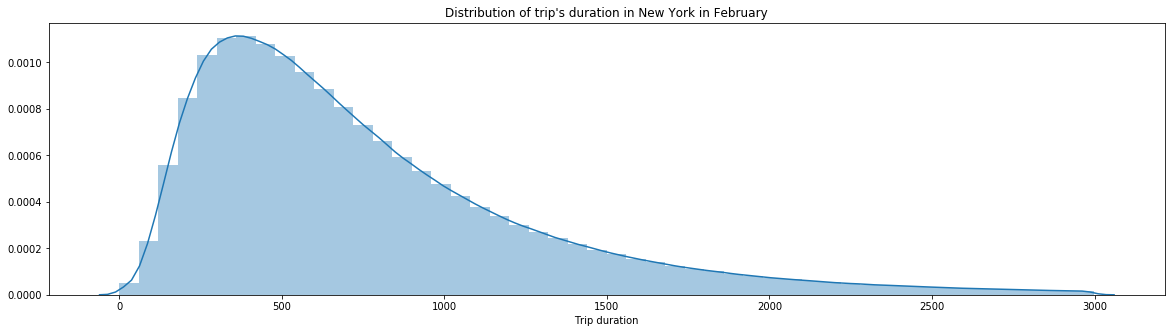

In [40]:
x2 = df2[df2.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x2["trip_duration"])
plt.title("Distribution of trip's duration in New York in February")
plt.xlabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


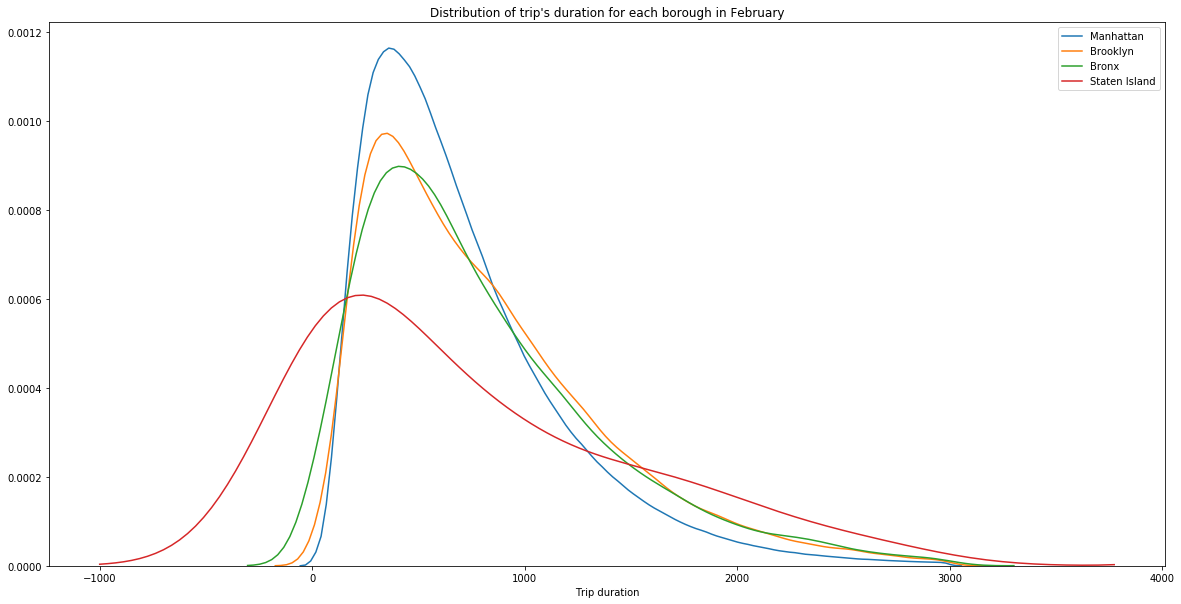

In [41]:
x2_man = ManhattanDf2[ManhattanDf2.trip_duration < 3000]
x2_brook = BrooklynDf2[BrooklynDf2.trip_duration < 3000]
x2_bronx = BronxDf2[BronxDf2.trip_duration < 3000]
x2_que = QueensDf2[QueensDf2.trip_duration < 3000]
x2_si = StatenDf2[StatenDf2.trip_duration < 3000]
x2_ewr = EwrDf2[EwrDf2.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x2_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x2_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x2_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x2_si["trip_duration"], label = "Staten Island")
#sns.kdeplot(x2_que["trip_duration"], label = "Queens")
#sns.kdeplot(x2_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in February")
plt.xlabel('Trip duration')
plt.show()

## MARCH

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


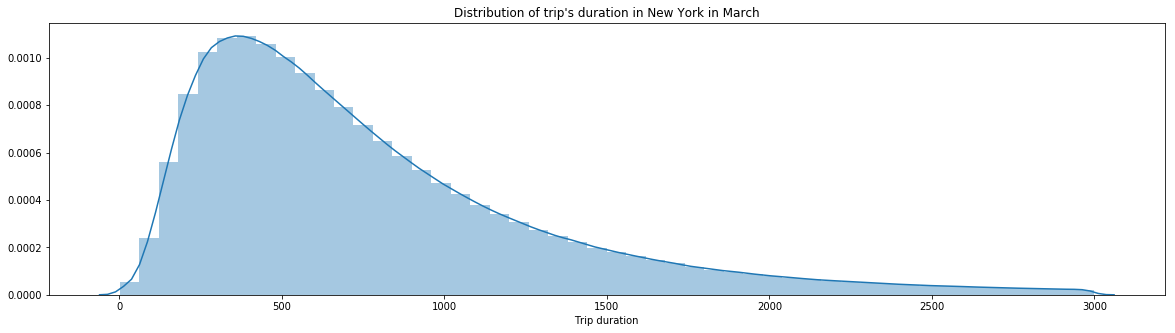

In [42]:
x3 = df3[df3.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x3["trip_duration"])
plt.title("Distribution of trip's duration in New York in March")
plt.xlabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


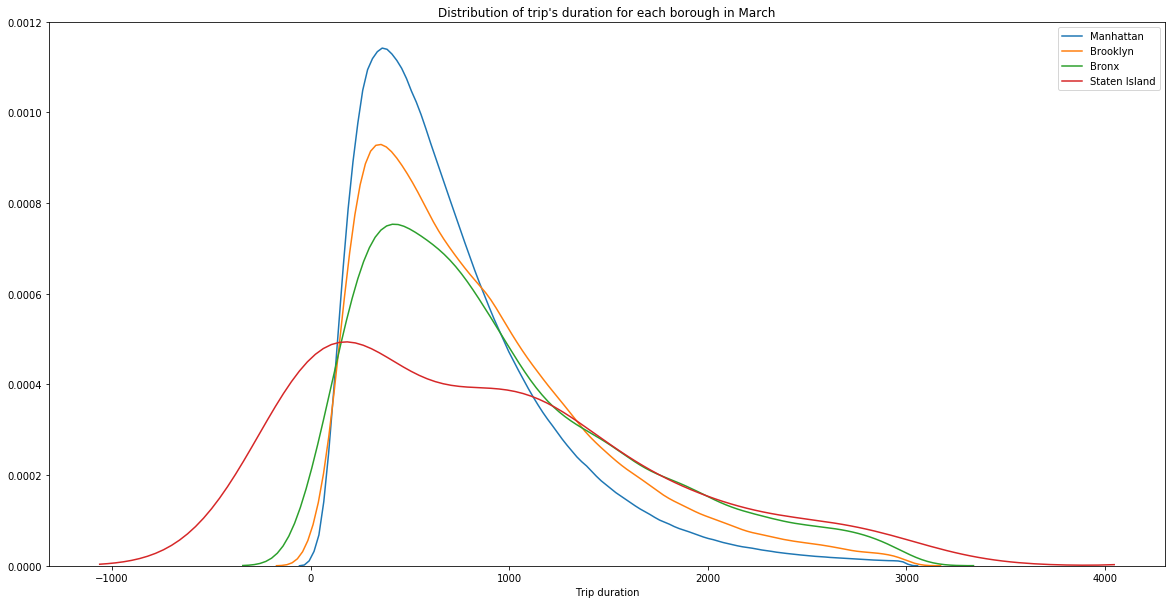

In [43]:
x3_man = ManhattanDf3[ManhattanDf3.trip_duration < 3000]
x3_brook = BrooklynDf3[BrooklynDf3.trip_duration < 3000]
x3_bronx = BronxDf3[BronxDf3.trip_duration < 3000]
x3_que = QueensDf3[QueensDf3.trip_duration < 3000]
x3_si = StatenDf3[StatenDf3.trip_duration < 3000]
x3_ewr = EwrDf3[EwrDf3.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x3_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x3_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x3_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x3_si["trip_duration"], label = "Staten Island")
#sns.kdeplot(x3_que["trip_duration"], label = "Queens")
#sns.kdeplot(x3_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in March")
plt.xlabel('Trip duration')
plt.show()

## APRIL

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


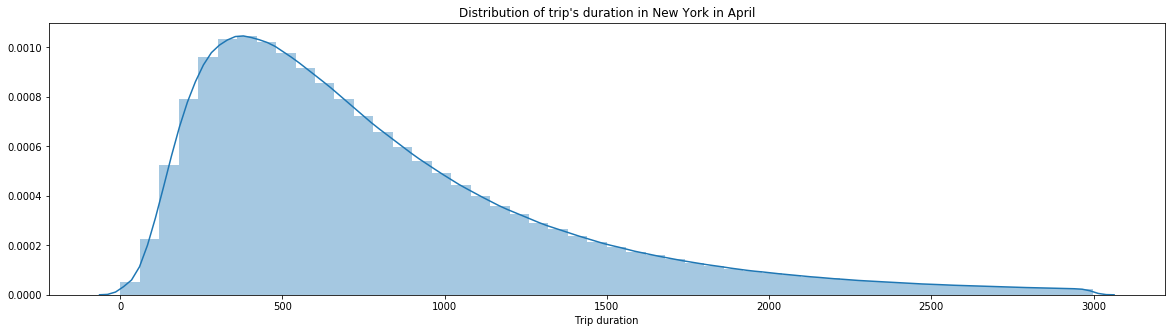

In [44]:
x4 = df4[df4.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x4["trip_duration"])
plt.title("Distribution of trip's duration in New York in April")
plt.xlabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


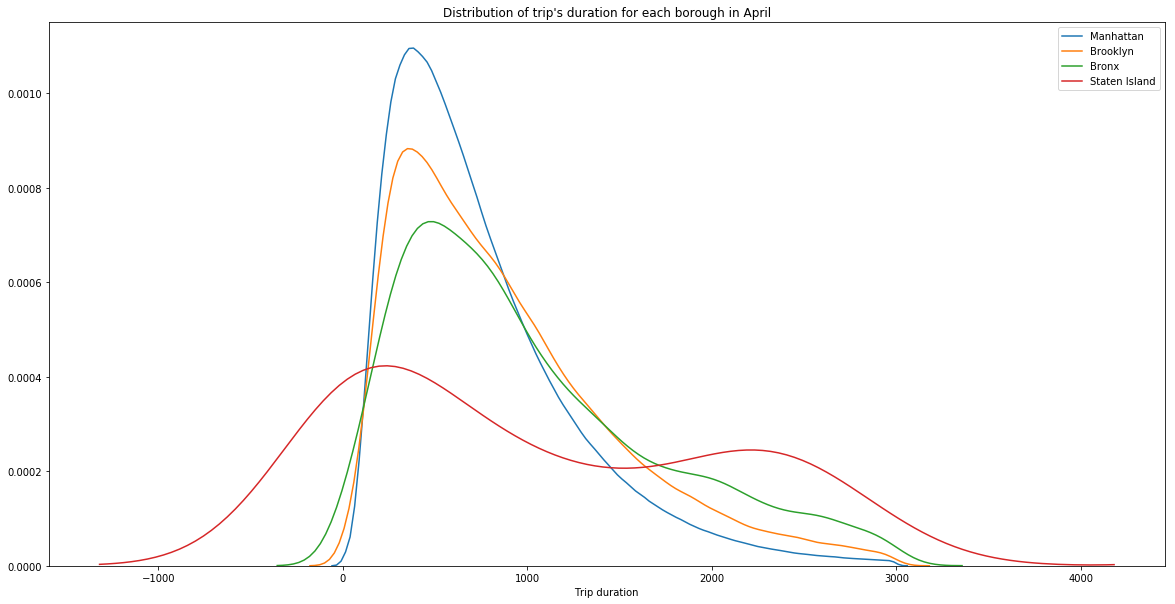

In [45]:
x4_man = ManhattanDf4[ManhattanDf4.trip_duration < 3000]
x4_brook = BrooklynDf4[BrooklynDf4.trip_duration < 3000]
x4_bronx = BronxDf4[BronxDf4.trip_duration < 3000]
x4_que = QueensDf4[QueensDf4.trip_duration < 3000]
x4_si = StatenDf4[StatenDf4.trip_duration < 3000]
x4_ewr = EwrDf4[EwrDf4.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x4_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x4_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x4_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x4_si["trip_duration"], label = "Staten Island")
#sns.kdeplot(x4_que["trip_duration"], label = "Queens")
#sns.kdeplot(x4_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in April")
plt.xlabel('Trip duration')
plt.show()

## MAY

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


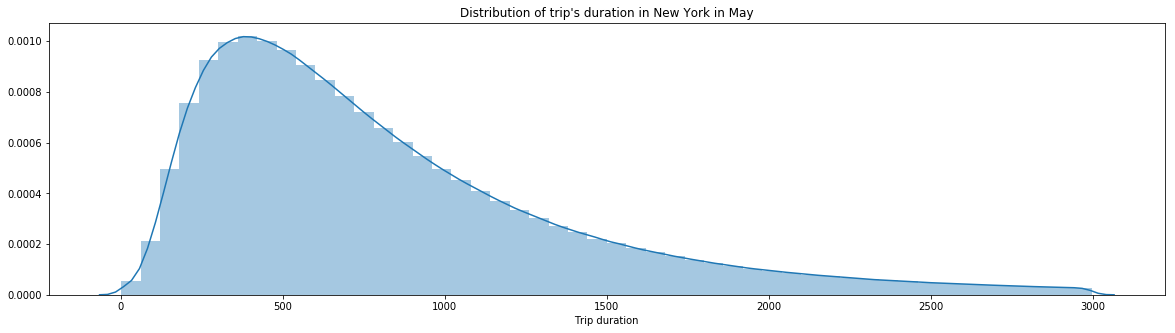

In [46]:
x5 = df5[df5.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x5["trip_duration"])
plt.title("Distribution of trip's duration in New York in May")
plt.xlabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


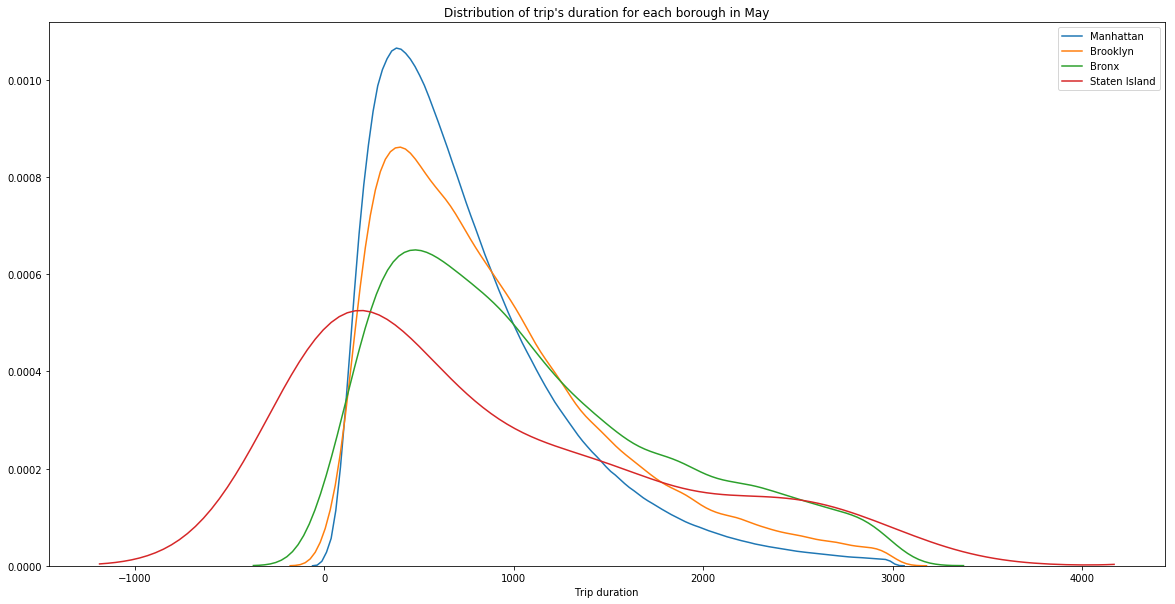

In [47]:
x5_man = ManhattanDf5[ManhattanDf5.trip_duration < 3000]
x5_brook = BrooklynDf5[BrooklynDf5.trip_duration < 3000]
x5_bronx = BronxDf5[BronxDf5.trip_duration < 3000]
x5_que = QueensDf5[QueensDf5.trip_duration < 3000]
x5_si = StatenDf5[StatenDf5.trip_duration < 3000]
x5_ewr = EwrDf5[EwrDf5.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x5_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x5_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x5_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x5_si["trip_duration"], label = "Staten Island")
#sns.kdeplot(x5_que["trip_duration"], label = "Queens")
#sns.kdeplot(x5_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in May")
plt.xlabel('Trip duration')
plt.show()

## JUNE

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


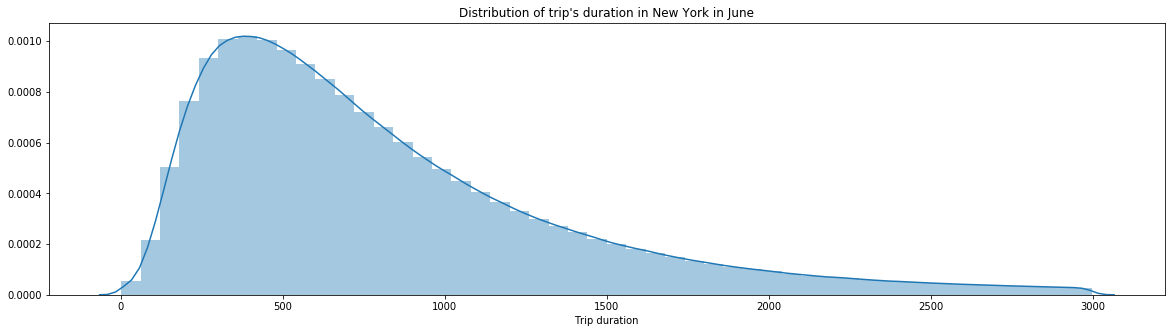

In [48]:
x6 = df6[df6.trip_duration < 3000]
plt.figure(figsize = (20,5))
sns.distplot(x6["trip_duration"])
plt.title("Distribution of trip's duration in New York in June")
plt.xlabel('Trip duration')
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


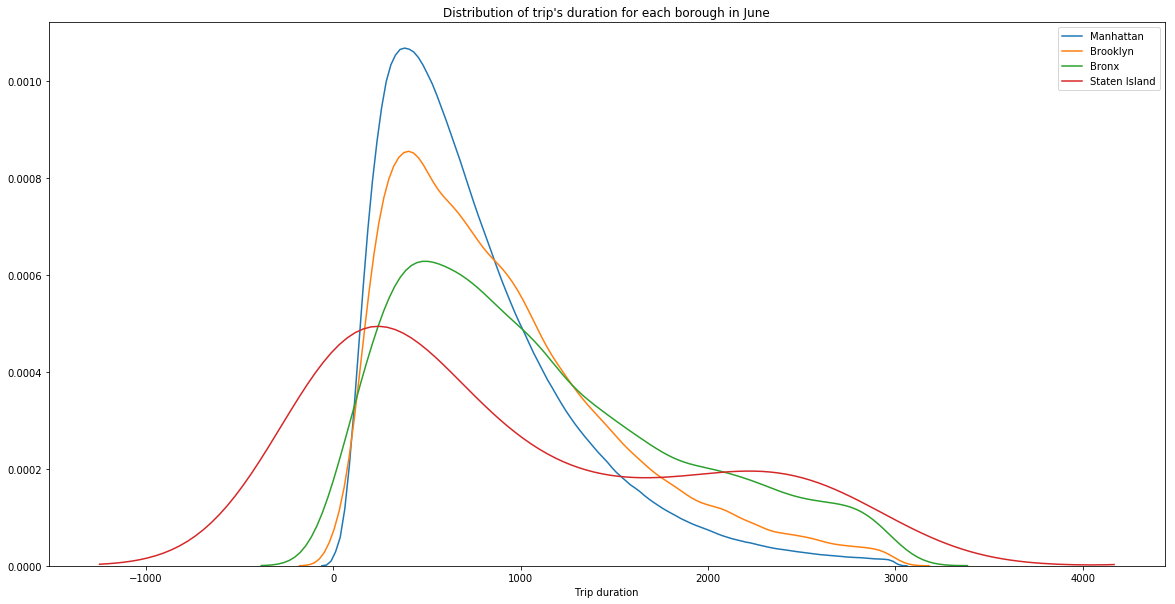

In [49]:
x6_man = ManhattanDf6[ManhattanDf6.trip_duration < 3000]
x6_brook = BrooklynDf6[BrooklynDf6.trip_duration < 3000]
x6_bronx = BronxDf6[BronxDf6.trip_duration < 3000]
x6_que = QueensDf6[QueensDf6.trip_duration < 3000]
x6_si = StatenDf6[StatenDf6.trip_duration < 3000]
x6_ewr = EwrDf6[EwrDf6.trip_duration < 3000]


plt.figure(figsize = (20,10))
sns.kdeplot(x6_man["trip_duration"], label = "Manhattan")
sns.kdeplot(x6_brook["trip_duration"], label = "Brooklyn")
sns.kdeplot(x6_bronx["trip_duration"], label = "Bronx")
sns.kdeplot(x6_si["trip_duration"], label = "Staten Island")
#sns.kdeplot(x6_que["trip_duration"], label = "Queens")
#sns.kdeplot(x5_ewr["trip_duration"], label = "EWR")


plt.title("Distribution of trip's duration for each borough in June")
plt.xlabel('Trip duration')
plt.show()

As we can see we was expecting that the trip duration would follow the same distribution also in the other months, so it can be conlcuded that in general there are a lot of trip with a short duration, and just a few with a longer duration. As always we have Manhattan and Brooklyn as borough with an higher frequency of short trips.

We can quickly look up at the distribution of New York among the months and check if there is any difference, even if we already expect that the trend will be steady.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Trip duration')

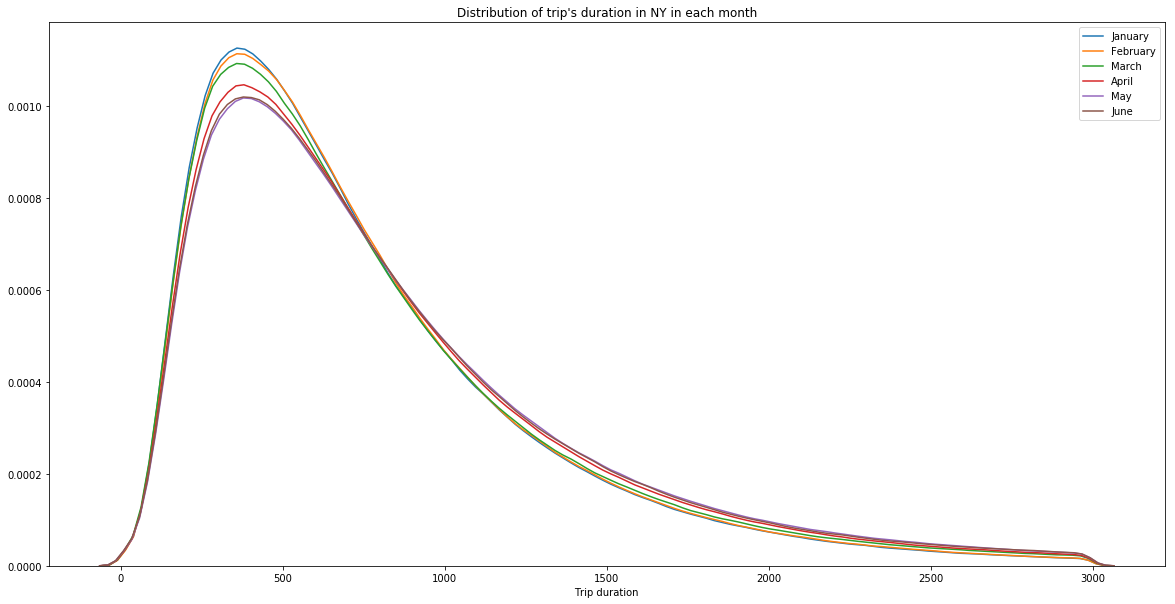

In [50]:
plt.figure(figsize = (20,10))
plt.title("Distribution of trip's duration in NY in each month")
sns.kdeplot(x1["trip_duration"], label = "January")
sns.kdeplot(x2["trip_duration"], label = "February")
sns.kdeplot(x3["trip_duration"], label = "March")
sns.kdeplot(x4["trip_duration"], label = "April")
sns.kdeplot(x5["trip_duration"], label = "May")
sns.kdeplot(x6["trip_duration"], label = "June")
plt.xlabel('Trip duration')



# RQ4

## JANUARY

Text(0.5,0,'Methods of payment')

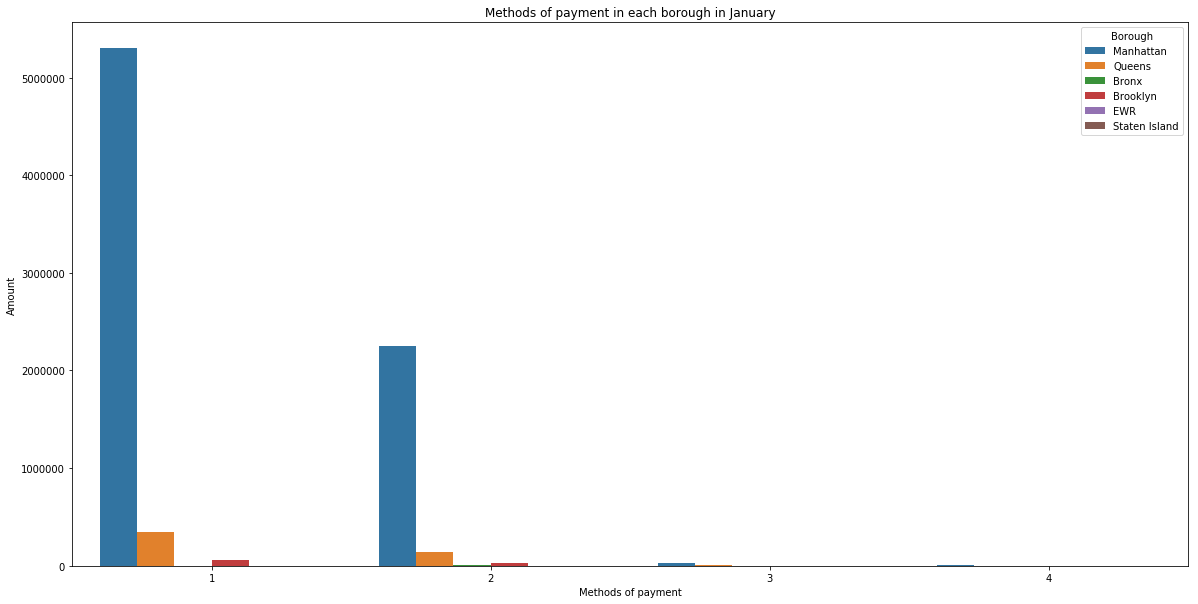

In [51]:
plt.figure(figsize = (20,10))
plt.title("Methods of payment in each borough in January")
sns.countplot(x = "payment_type", hue = "Borough", data = df1)
plt.ylabel('Amount')
plt.xlabel('Methods of payment')

In general the way of payment more common is by credit card, followed by cash. In bronx it can see the opposite.



We create a chi-squared test in order to find if there is dependecy between the method of payment and the borough. We fix an alpha = 0.05.
So:
- $H_0$: boroughs and payment type are indipendent
- $H_1$:  boroughs and payment type are dipendent

In [52]:
pay1_man = np.array(ManhattanDf1["payment_type"].value_counts())
pay1_brook = np.array(BrooklynDf1["payment_type"].value_counts())
pay1_bronx = np.array(BronxDf1["payment_type"].value_counts())
pay1_queens = np.array(QueensDf1["payment_type"].value_counts())
pay1_si = np.array(StatenDf1["payment_type"].value_counts())
pay1_ewr = np.array(EwrDf1["payment_type"].value_counts())

pay1 = np.array([pay1_man, pay1_brook, pay1_bronx, pay1_queens, pay1_si, pay1_ewr])

stat1, p1, dof1, expected1 = chi2_contingency(pay1)

print(stat1) #test statistic
print(p1) #p value
print(dof1) #degrees of freedom

4481.3473537863065
0.0
15


Looking at the table of the Chi-squared distribution, we find the value 25.00 in correspondence of 15 degrees of freedom and for alpha = 5%. Our test statistic is bigger then 25, so we reject $H_0$. Furthermore the dependency is confirm by the result of the p-value that must be less than alpha, infact it is equal to 0.
So it can be concluded that there is dependency among the boroughs and the payment type.
Repeating the same test for the other months we obtain the same results.

## FEBRUARY

In [53]:
pay2_man = np.array(ManhattanDf2["payment_type"].value_counts())
pay2_brook = np.array(BrooklynDf2["payment_type"].value_counts())
pay2_bronx = np.array(BronxDf2["payment_type"].value_counts())
pay2_queens = np.array(QueensDf2["payment_type"].value_counts())
pay2_si = np.array(StatenDf2["payment_type"].value_counts())
pay2_si = np.append(pay2_si,0)
pay2_ewr = np.array(EwrDf2["payment_type"].value_counts())
pay2_ewr =np.append(pay2_ewr,0)

pay2 = np.array([pay2_man, pay2_brook, pay2_bronx, pay2_queens, pay2_si, pay2_ewr])

stat2, p2, dof2, expected2 = chi2_contingency(pay2)

print(stat2) #test statistic
print(p2) #p value
print(dof2) #degrees of freedom

4181.01385665683
0.0
15


## MARCH

In [54]:
pay3_man = np.array(ManhattanDf3["payment_type"].value_counts())
pay3_brook = np.array(BrooklynDf3["payment_type"].value_counts())
pay3_bronx = np.array(BronxDf3["payment_type"].value_counts())
pay3_queens = np.array(QueensDf3["payment_type"].value_counts())
pay3_si = np.array(StatenDf3["payment_type"].value_counts())
pay3_si = np.append(pay3_si,0)
pay3_ewr = np.array(EwrDf3["payment_type"].value_counts())

pay3 = np.array([pay3_man, pay3_brook, pay3_bronx, pay3_queens, pay3_si, pay3_ewr])

stat3, p3, dof3, expected3 = chi2_contingency(pay3)

print(stat3) #test statistic
print(p3) #p value
print(dof3) #degrees of freedom

5108.7511087717385
0.0
15


## APRIL

In [55]:
pay4_man = np.array(ManhattanDf4["payment_type"].value_counts())
pay4_brook = np.array(BrooklynDf4["payment_type"].value_counts())
pay4_bronx = np.array(BronxDf4["payment_type"].value_counts())
pay4_queens = np.array(QueensDf4["payment_type"].value_counts())
pay4_si = np.array(StatenDf4["payment_type"].value_counts())
pay4_si = np.append(pay4_si,0)
pay4_ewr = np.array(EwrDf4["payment_type"].value_counts())

pay4 = np.array([pay4_man, pay4_brook, pay4_bronx, pay4_queens, pay4_si, pay4_ewr])

stat4, p4, dof4, expected4 = chi2_contingency(pay4)

print(stat4) #test statistic
print(p4) #p value
print(dof4) #degrees of freedom

4567.4146424187265
0.0
15


## MAY

In [56]:
pay5_man = np.array(ManhattanDf5["payment_type"].value_counts())
pay5_brook = np.array(BrooklynDf5["payment_type"].value_counts())
pay5_bronx = np.array(BronxDf5["payment_type"].value_counts())
pay5_queens = np.array(QueensDf5["payment_type"].value_counts())
pay5_si = np.array(StatenDf5["payment_type"].value_counts())
pay5_ewr = np.array(EwrDf5["payment_type"].value_counts())

pay5 = np.array([pay5_man, pay5_brook, pay5_bronx, pay5_queens, pay5_si, pay5_ewr])

stat5, p5, dof5, expected5 = chi2_contingency(pay5)

print(stat5) #test statistic
print(p5) #p value
print(dof5) #degrees of freedom

3656.659015187065
0.0
15


## JUNE

In [57]:
pay6_man = np.array(ManhattanDf6["payment_type"].value_counts())
pay6_brook = np.array(BrooklynDf6["payment_type"].value_counts())
pay6_bronx = np.array(BronxDf6["payment_type"].value_counts())
pay6_queens = np.array(QueensDf6["payment_type"].value_counts())
pay6_si = np.array(StatenDf6["payment_type"].value_counts())
pay6_ewr = np.array(EwrDf6["payment_type"].value_counts())
pay6_ewr =np.append(pay6_ewr,0)

pay6 = np.array([pay6_man, pay6_brook, pay6_bronx, pay6_queens, pay6_si, pay6_ewr])

stat6, p6, dof6, expected3 = chi2_contingency(pay6)

print(stat6) #test statistic
print(p6) #p value
print(dof6) #degrees of freedom

3644.227275461026
0.0
15


# RQ5

## JANUARY

In [58]:
scipy.stats.pearsonr(df1["trip_distance"], df1["trip_duration"])


(0.007978657609473012, 2.7740444462953375e-115)

As we know the Pearson coefficient, also known as  correlation, can assume values from 0 up to 1. If the value is very close to 0, there is not correlation, on the contrary if it is close to 1, there is correlation.
In this case, looking at the outcome there is not a linear dipendence because the duration of the trip can be influenced from another factor, for example traffic.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Trip duration')

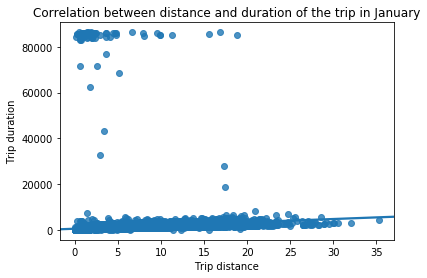

In [69]:
plt.title("Correlation between distance and duration of the trip in January")
sns.regplot("trip_distance", "trip_duration", data=df1.sample(50000))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')


So in order to find a statistical significance correlation, we manipulate a little bit our data. 
We look at the quantiles for the trip distance in order to divide the long distance from the other. So the 75% quantile is equal to 2.8, it means there will be considered only trips with a distance bigger then 2.8 miles, but lower than 40 miles, because they are unlucky. Also we consider trips with a duration not bigger than 2 hours (7200 seconds).

In [70]:
df1_longdist = df1[(df1["trip_distance"] >= 2.87) & (df1["trip_distance"]<= 40) & (df1["trip_duration"] <= 7200)]
corr1, value1 = scipy.stats.pearsonr(df1_longdist["trip_distance"], df1_longdist["trip_duration"])
print(corr1) #correlation
print(value1) #p-value

0.6717788671311763
0.0


The correlation increases and, according to the p value equal to 0, we can conclude that there is dependence between distance and duration of the trip.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


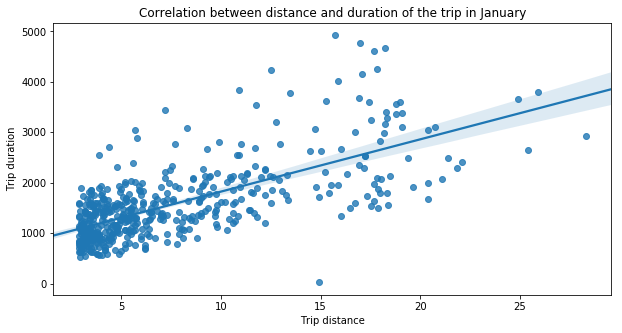

In [71]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in January")
sns.regplot("trip_distance", "trip_duration", data = df1_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df1_longdist

## FEBRUARY

In [72]:
df2_longdist = df2[(df2["trip_distance"] >= 2.87) & (df2["trip_distance"]<= 40) & (df2["trip_duration"] <= 7200)]
corr2, value2 = scipy.stats.pearsonr(df2_longdist["trip_distance"], df2_longdist["trip_duration"])
print(corr2) #correlation
print(value2) #p-value

0.6759831717590757
0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


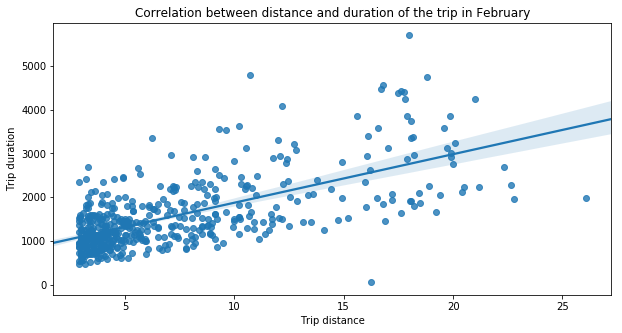

In [73]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in February")
sns.regplot("trip_distance", "trip_duration", data = df2_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df2_longdist

## MARCH

In [74]:
df3_longdist = df3[(df3["trip_distance"] >= 2.87) & (df3["trip_distance"]<= 40) & (df3["trip_duration"] <= 7200)]
corr3, value3 = scipy.stats.pearsonr(df3_longdist["trip_distance"], df3_longdist["trip_duration"])
print(corr3) #correlation
print(value3) #p-value

0.6809589060128789
0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


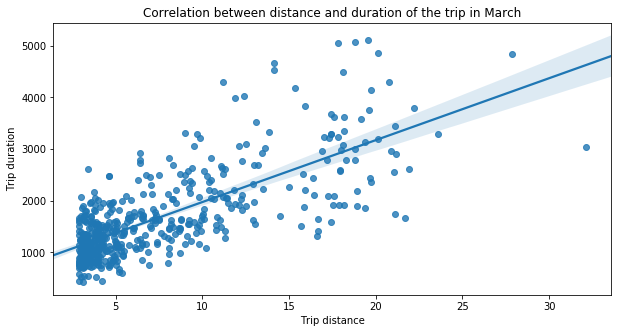

In [75]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in March")
sns.regplot("trip_distance", "trip_duration", data = df3_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df3_longdist

## APRIL

In [82]:
df4_longdist = df4[(df4["trip_distance"] >= 2.87) & (df4["trip_distance"]<= 40) & (df4["trip_duration"] <= 7200)]
corr4, value4 = scipy.stats.pearsonr(df4_longdist["trip_distance"], df4_longdist["trip_duration"])
print(corr4) #correlation
print(value4) #p-value

0.6759259421879606
0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


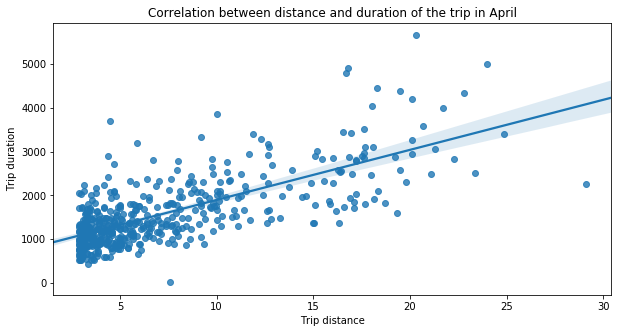

In [83]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in April")
sns.regplot("trip_distance", "trip_duration", data = df4_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df4_longdist

## MAY

In [84]:
df5_longdist = df5[(df5["trip_distance"] >= 2.87) & (df5["trip_distance"]<= 40) & (df5["trip_duration"] <= 7200)]
corr5, value5 = scipy.stats.pearsonr(df5_longdist["trip_distance"], df5_longdist["trip_duration"])
print(corr5) #correlation
print(value5) #p-value

0.6700027011975274
0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


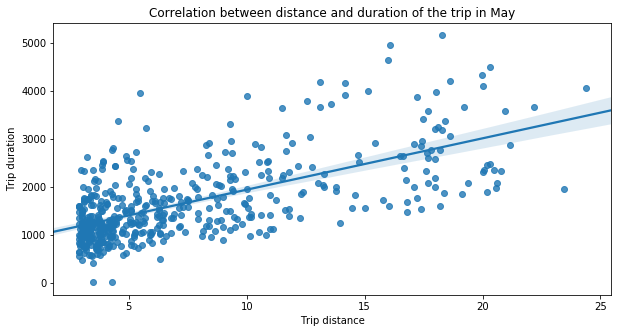

In [86]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in May")
sns.regplot("trip_distance", "trip_duration", data = df5_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df5_longdist

## JUNE

In [88]:
df6_longdist = df6[(df6["trip_distance"] >= 2.87) & (df6["trip_distance"]<= 40) & (df6["trip_duration"] <= 7200)]
corr6, value6 = scipy.stats.pearsonr(df6_longdist["trip_distance"], df6_longdist["trip_duration"])
print(corr6) #correlation
print(value6) #p-value

0.6989853708897829
0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


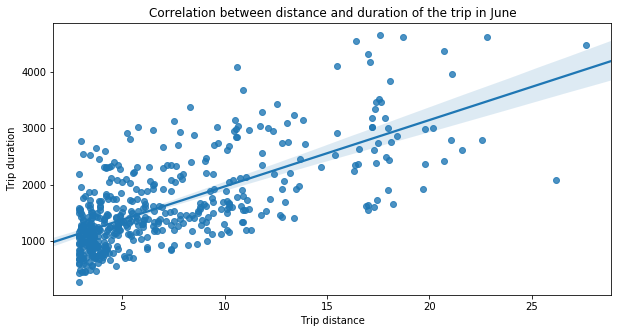

In [89]:
plt.figure(figsize=(10,5))
plt.title("Correlation between distance and duration of the trip in June")
sns.regplot("trip_distance", "trip_duration", data = df6_longdist.sample(500))
plt.xlabel('Trip distance')
plt.ylabel('Trip duration')
del df6_longdist

In order to have a better view, it has been decided to create an histogram that shows the differences of the correlation among the months.

In [90]:
correlations = {"Month": ["January", "February", "March", "April", "May", "June"], "pearson_coeff": [corr1, corr2, corr3, corr4, corr5, corr6]}



Text(0.5,0,'Correlation')

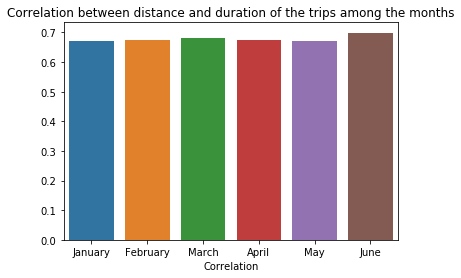

In [91]:
plt.title("Correlation between distance and duration of the trips among the months")
sns.barplot(x = "Month", y = "pearson_coeff", data = correlations)
plt.xlabel('Correlation')


The trend of the correlation is steady for all the months, in June it can been observed a bit higher value.

# CRQ1

## JANUARY

In [92]:
# create a new column that contains the fare amount per mile

#it helps to remove the warning "A value is trying to be set on a copy of a slice from a DataFrame."
ManhattanDf1 = ManhattanDf1.copy() 
BrooklynDf1 = BrooklynDf1.copy()
QueensDf1 = QueensDf1.copy()
BronxDf1 = BronxDf1.copy()
StatenDf1 = StatenDf1.copy()
EwrDf1 = EwrDf1.copy()

ManhattanDf1["Fare_ML"] = ManhattanDf1["fare_amount"]/ManhattanDf1["trip_distance"]
BrooklynDf1["Fare_ML"] = BrooklynDf1["fare_amount"]/BrooklynDf1["trip_distance"]
QueensDf1["Fare_ML"] = QueensDf1["fare_amount"]/QueensDf1["trip_distance"]
BronxDf1["Fare_ML"] = BronxDf1["fare_amount"]/BronxDf1["trip_distance"]
StatenDf1["Fare_ML"] = StatenDf1["fare_amount"]/StatenDf1["trip_distance"]
EwrDf1["Fare_ML"] = EwrDf1["fare_amount"]/EwrDf1["trip_distance"]



Let's see the summaries of the fare per mile for each borough:

In [93]:
ManhattanDf1["Fare_ML"].describe()

count    7.587520e+06
mean     6.735511e+00
std      4.049912e+01
min      7.716049e-02
25%      4.545455e+00
50%      5.652174e+00
75%      7.142857e+00
max      9.812000e+03
Name: Fare_ML, dtype: float64

In [28]:
BrooklynDf1["Fare_ML"].describe()

count    94504.000000
mean         6.218023
std         44.320224
min          0.079365
25%          3.780069
50%          4.565217
75%          5.905512
max       5700.000000
Name: Fare_ML, dtype: float64

In [29]:
BronxDf1["Fare_ML"].describe()

count    6379.000000
mean        8.951863
std        71.920574
min         0.081433
25%         3.690476
50%         4.750000
75%         6.122449
max      3950.000000
Name: Fare_ML, dtype: float64

In [30]:
QueensDf1["Fare_ML"].describe()

count    492884.000000
mean          6.594980
std          99.317231
min           0.000021
25%           2.868391
50%           3.068182
75%           3.496115
max        7800.000000
Name: Fare_ML, dtype: float64

In [31]:
StatenDf1["Fare_ML"].describe()

count    104.000000
mean      12.142239
std       58.386705
min        2.400739
25%        3.539490
50%        4.963399
75%        8.750000
max      600.000000
Name: Fare_ML, dtype: float64

In [32]:
EwrDf1["Fare_ML"].describe()

count     121.000000
mean      592.907603
std      1637.692471
min         0.139665
25%         4.092072
50%        17.500000
75%       316.666667
max      8500.000000
Name: Fare_ML, dtype: float64

It has been decided to filter the fare per mile up to the 75% quintile for each borough, and at 50% (the median) for EWR.

In [94]:
ManhattanDf1 = ManhattanDf1[ManhattanDf1["Fare_ML"] <= ManhattanDf1["Fare_ML"].quantile(0.5)]
BrooklynDf1 = BrooklynDf1[BrooklynDf1["Fare_ML"] <= BrooklynDf1["Fare_ML"].quantile(0.5)]
QueensDf1 = QueensDf1[QueensDf1["Fare_ML"] <= QueensDf1["Fare_ML"].quantile(0.5)]
BronxDf1 = BronxDf1[BronxDf1["Fare_ML"] <= BronxDf1["Fare_ML"].quantile(0.5)]
StatenDf1 = StatenDf1[StatenDf1["Fare_ML"] <= StatenDf1["Fare_ML"].quantile(0.5)]
EwrDf1 = EwrDf1[EwrDf1["Fare_ML"] <= EwrDf1["Fare_ML"].quantile(0.75)]

In [95]:
#Mean for each borough for "Fare_ML"
Fav1_man = ManhattanDf1['Fare_ML'].mean()
Fav1_brook = BrooklynDf1['Fare_ML'].mean()
Fav1_que = QueensDf1['Fare_ML'].mean()
Fav1_bronx = BronxDf1['Fare_ML'].mean()
Fav1_si = StatenDf1['Fare_ML'].mean()
Fav1_ewr = EwrDf1['Fare_ML'].mean()


In [96]:
# Standard deviation for each borough for "Fare_ML"
Fsd1_man = ManhattanDf1['Fare_ML'].std()
Fsd1_brook = BrooklynDf1['Fare_ML'].std()
Fsd1_que = QueensDf1['Fare_ML'].std()
Fsd1_bronx = BronxDf1['Fare_ML'].std()
Fsd1_si = StatenDf1['Fare_ML'].std()
Fsd1_ewr = EwrDf1['Fare_ML'].std()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 10)

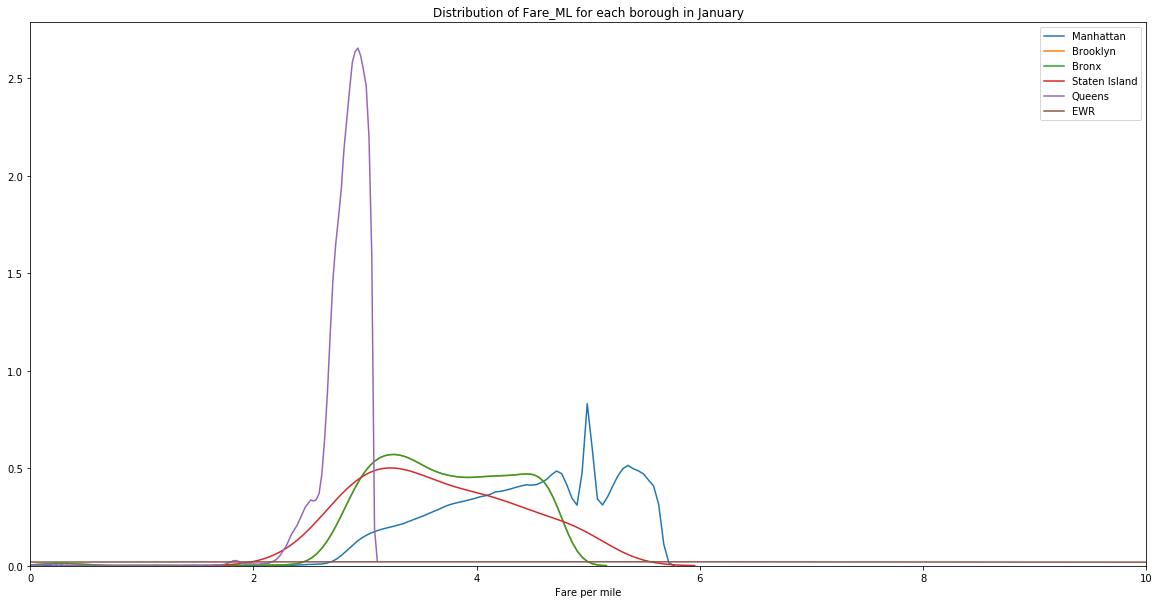

In [97]:
plt.figure(figsize = (20,10))
plt.title("Distribution of Fare_ML for each borough in January")
plt.xlabel('Fare per mile')
sns.kdeplot(ManhattanDf1["Fare_ML"], label = "Manhattan")
sns.kdeplot(BronxDf1["Fare_ML"], label = "Brooklyn")
sns.kdeplot(BronxDf1["Fare_ML"], label = "Bronx")
sns.kdeplot(StatenDf1["Fare_ML"], label = "Staten Island")
sns.kdeplot(QueensDf1["Fare_ML"], label = "Queens")
sns.kdeplot(EwrDf1["Fare_ML"], label = "EWR")

plt.xlim(0, 10)


We run a t-test in order to find if Taxis trip in some boroughs, on average, are more expensive than others.
Fixed an alpha = 0.05, we define:
- $H_0$: the distribution of the price per mile are the same
- $H_1$: the distribution of the price per mile are not the same

Looking at the t-distribution table, the t-statistics is very high, more than 1500.

In [98]:
#T- Test for all possible pairs among the boroughs

#1. Manhattan & Brooklyn
a = np.array(ManhattanDf1.Fare_ML, dtype=pd.Series) 
b = np.array(BrooklynDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)

In [99]:
print(t) #t-value
print(value) #p value

208.97385905299376
0.0


In [100]:
#2. Mahattan and Queens
a = np.array(ManhattanDf1.Fare_ML, dtype=pd.Series) 
b = np.array(QueensDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

1072.0993108180967
0.0


In [101]:
#3. Mahattan and Bronx
a = np.array(ManhattanDf1.Fare_ML, dtype=pd.Series) 
b = np.array(BronxDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

56.8398999329117
0.0


In [102]:
#4. Mahattan and Staten Island
a = np.array(ManhattanDf1.Fare_ML, dtype=pd.Series) 
b = np.array(StatenDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

7.675161451822808
1.6524948450886174e-14


In [103]:
#5. Mahattan and Ewr
a = np.array(ManhattanDf1.Fare_ML, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-484.0774139771779
0.0


In [104]:
#6. Brooklyn and Queens
a = np.array(BrooklynDf1.Fare_ML, dtype=pd.Series)
b = np.array(QueensDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

640.2860710917339
0.0


In [105]:
#7. Brooklyn and Bronx
a = np.array(BrooklynDf1.Fare_ML, dtype=pd.Series)
b = np.array(BronxDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

3.3490115274182837
0.0008115964291288094


In [106]:
#8. Brooklyn and Staten Island
a = np.array(BrooklynDf1.Fare_ML, dtype=pd.Series)
b = np.array(StatenDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

1.0885526987286993
0.27635671832028424


In [107]:
#9. Brooklyn and EWR
a = np.array(BrooklynDf1.Fare_ML, dtype=pd.Series)
b = np.array(EwrDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-117.18312344016084
0.0


In [108]:
#10. Queens and Bronx
a = np.array(QueensDf1.Fare_ML, dtype=pd.Series)
b = np.array(BronxDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-218.89729329228908
0.0


In [109]:
#11. Queens and staten Island
a = np.array(QueensDf1.Fare_ML, dtype=pd.Series)
b = np.array(StatenDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-27.975379399231628
6.027869016994757e-172


In [110]:
#12. Queens and Ewr
a = np.array(QueensDf1.Fare_ML, dtype=pd.Series)
b = np.array(EwrDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-273.1367114358155
0.0


In [111]:
#13. Bronx and Staten Island
a = np.array(BronxDf1.Fare_ML, dtype=pd.Series)
b = np.array(StatenDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

0.494096938143155
0.6212710916028243


In [112]:
#14. Bronx and Ewr
a = np.array(BronxDf1.Fare_ML, dtype=pd.Series)
b = np.array(EwrDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-30.75691527321119
7.98647433609401e-183


In [113]:
#15. Staten Island and Ewr
a = np.array(StatenDf1.Fare_ML, dtype=pd.Series)
b = np.array(EwrDf1.Fare_ML, dtype=pd.Series)
t, value = stats.ttest_ind(a,b)
print(t) #t-value
print(value) #p value

-3.901743057743313
0.00014692934605864904


The t-statistics is always greater than the t-value, so we reject $H_0$. It means that the test concludes that there is a statistically significant difference in the price per mile between the boroughs, it is also confirm by the p value that is always < alpha = 0.05.

Now we create the column of the price per miles weight with the duration of the trip, as follow:

In [114]:
ManhattanDf1["trip_minutes"]= ManhattanDf1["trip_duration"]/60
BrooklynDf1["trip_minutes"]= BrooklynDf1["trip_duration"]/60
QueensDf1["trip_minutes"]= QueensDf1["trip_duration"]/60
BronxDf1["trip_minutes"]= BronxDf1["trip_duration"]/60
StatenDf1["trip_minutes"]= StatenDf1["trip_duration"]/60
EwrDf1["trip_minutes"]= EwrDf1["trip_duration"]/60

In [115]:
ManhattanDf1["Fare_ML_M"]= ManhattanDf1["fare_amount"]/ManhattanDf1["trip_minutes"]
BrooklynDf1["Fare_ML_M"]= BrooklynDf1["fare_amount"]/BrooklynDf1["trip_minutes"]
QueensDf1["Fare_ML_M"]= QueensDf1["fare_amount"]/QueensDf1["trip_minutes"]
BronxDf1["Fare_ML_M"]= BronxDf1["fare_amount"]/BronxDf1["trip_minutes"]
StatenDf1["Fare_ML_M"]= StatenDf1["fare_amount"]/StatenDf1["trip_minutes"]
EwrDf1["Fare_ML_M"]= EwrDf1["fare_amount"]/EwrDf1["trip_minutes"]

In [116]:
#Mean for each borough for "Fare_ML_M"
Fav2_man = ManhattanDf1['Fare_ML_M'].mean()
Fav2_brook = BrooklynDf1['Fare_ML_M'].mean()
Fav2_que = QueensDf1['Fare_ML_M'].mean()
Fav2_bronx = BronxDf1['Fare_ML_M'].mean()
Fav2_si = StatenDf1['Fare_ML_M'].mean()
Fav2_ewr = EwrDf1['Fare_ML_M'].mean()


In [117]:
# Standard deviation for each borough for "Fare_ML_M"
Fsd2_man = ManhattanDf1['Fare_ML_M'].std()
Fsd2_brook = BrooklynDf1['Fare_ML_M'].std()
Fsd2_que = QueensDf1['Fare_ML_M'].std()
Fsd2_bronx = BronxDf1['Fare_ML_M'].std()
Fsd2_si = StatenDf1['Fare_ML_M'].std()
Fsd2_ewr = EwrDf1['Fare_ML_M'].std()

In [64]:
ManhattanDf1['Fare_ML_M'].describe()

count    3.794179e+06
mean     1.013803e+00
std      5.582772e+00
min      2.780481e-03
25%      8.075370e-01
50%      9.154316e-01
75%      1.066236e+00
max      3.120000e+03
Name: Fare_ML_M, dtype: float64

In [65]:
BrooklynDf1['Fare_ML_M'].describe()

count    47364.000000
mean         1.332867
std         14.055100
min          0.004517
25%          0.868484
50%          0.977528
75%          1.136364
max       1890.000000
Name: Fare_ML_M, dtype: float64

In [66]:
QueensDf1['Fare_ML_M'].describe()

count    246606.000000
mean          1.473517
std           6.616429
min           0.011862
25%           1.131408
50%           1.329114
75%           1.544665
max        1040.000000
Name: Fare_ML_M, dtype: float64

In [67]:
BronxDf1["Fare_ML_M"].describe()

count    3202.000000
mean        1.568029
std         8.025041
min         0.004183
25%         0.886700
50%         1.028381
75%         1.237569
max       300.000000
Name: Fare_ML_M, dtype: float64

In [68]:
StatenDf1['Fare_ML_M'].describe()

count    52.000000
mean      1.882010
std       5.400537
min       0.718232
25%       0.888317
50%       1.038333
75%       1.304784
max      40.000000
Name: Fare_ML_M, dtype: float64

In [69]:
EwrDf1['Fare_ML_M'].describe()

count     92.000000
mean     107.225904
std      135.542922
min        0.795756
25%        2.378145
50%       56.095770
75%      165.298861
max      712.500000
Name: Fare_ML_M, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


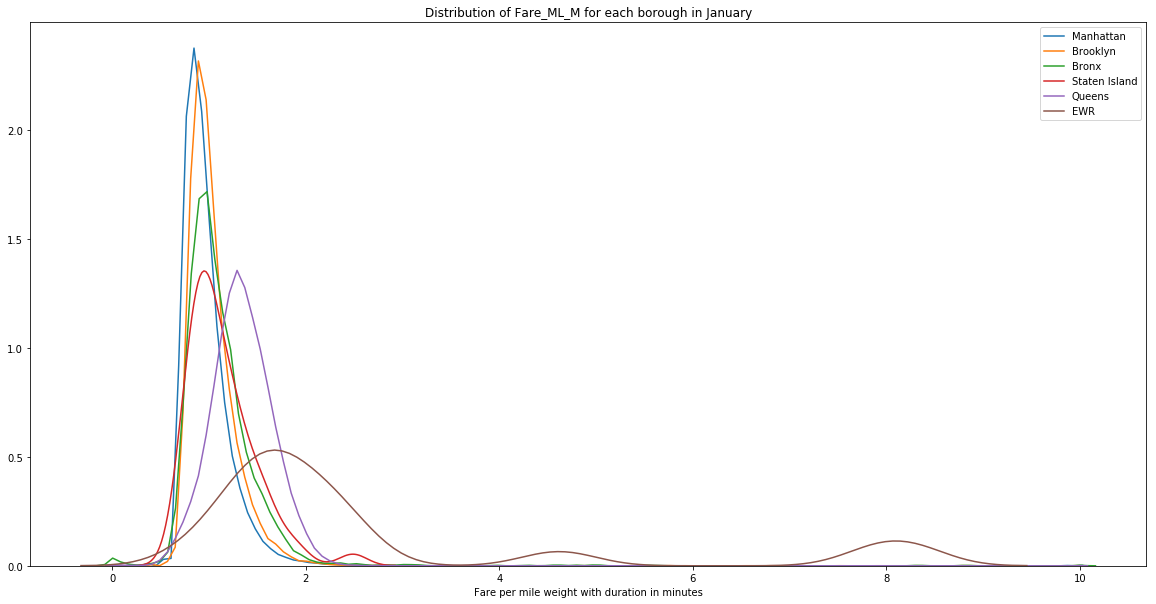

In [118]:
ManhattanDf1 = ManhattanDf1[ManhattanDf1.Fare_ML_M < 10]
BrooklynDf1 = BrooklynDf1[BrooklynDf1.Fare_ML_M < 10]
BronxDf1 = BronxDf1[BronxDf1.Fare_ML_M < 10]
QueensDf1 = QueensDf1[QueensDf1.Fare_ML_M < 10]
StatenDf1 = StatenDf1[StatenDf1.Fare_ML_M < 10]
EwrDf1 = EwrDf1[EwrDf1.Fare_ML_M < 10]


plt.figure(figsize = (20,10))
sns.kdeplot(ManhattanDf1["Fare_ML_M"], label = "Manhattan")
sns.kdeplot(BrooklynDf1["Fare_ML_M"], label = "Brooklyn")
sns.kdeplot(BronxDf1["Fare_ML_M"], label = "Bronx")
sns.kdeplot(StatenDf1["Fare_ML_M"], label = "Staten Island")
sns.kdeplot(QueensDf1["Fare_ML_M"], label = "Queens")
sns.kdeplot(EwrDf1["Fare_ML_M"], label = "EWR")


plt.title("Distribution of Fare_ML_M for each borough in January")
plt.xlabel("Fare per mile weight with duration in minutes")
plt.show()

We run a t-test in order to find if Taxis trip in some boroughs, on average, are more expensive than others.
Fixed an alpha = 0.05, we define:
- $H_0$: the distribution of the price per mile weight with the duration are the same
- $H_1$: the distribution of the price per mile weight with the duration are not the same

Looking at the t-distribution table, the t-statistics is very high, more than 1500.

In [119]:
# T- Test for all possible pairs among the boroughs
#1. Manhattan & Brooklyn
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(BrooklynDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-55.72104140629072, pvalue=0.0)

In [120]:
#Pair2: Manhattan & Bronx
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(BronxDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-30.1685525046051, pvalue=6.470306491157699e-200)

In [121]:
#Pair3: Manhattan & Queens
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(QueensDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-685.8611298800184, pvalue=0.0)

In [122]:
#Pair4: Manhattan & Staten Island
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(StatenDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-4.719331381480615, pvalue=2.366295094717231e-06)

In [123]:
#Pair5: Manhattan & EWR
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML_M, dtype=pd.Series) 
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-38.8675216257427, pvalue=0.0)

In [124]:
#Pair6: Brooklyn & Bronx
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(BronxDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-30.1685525046051, pvalue=6.470306491157699e-200)

In [125]:
#Pair7: Brooklyn & Queens
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(QueensDf1.Fare_ML_M, dtype=pd.Series) 
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-685.8611298800184, pvalue=0.0)

In [126]:
#Pair8: Brooklyn & Staten Island
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(StatenDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-4.719331381480615, pvalue=2.366295094717231e-06)

In [127]:
#Pair9: Brooklyn & EWR
a = np.array(ManhattanDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML_M, dtype=pd.Series) 
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-38.8675216257427, pvalue=0.0)

In [128]:

#Pair10: Bronx & Queens
a = np.array(BronxDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(QueensDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-37.55247967878755, pvalue=9.385591378947943e-308)

In [129]:
#Pair11: Bronx & Staten Island
a = np.array(BronxDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(StatenDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-0.5196169603780808, pvalue=0.6033662128927777)

In [130]:
#Pair12: Bronx & EWR
a = np.array(BronxDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-18.68897501850025, pvalue=4.555347100853426e-74)

In [131]:

#Pair13: Queens & Staten Island
a = np.array(QueensDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(StatenDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=4.15751748743827, pvalue=3.21833359143254e-05)

In [132]:
#Pair14: Queens & EWR
a = np.array(QueensDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-22.07093552577612, pvalue=7.657377716041057e-108)

In [133]:
#Pair15: Staten Island & EWR
a = np.array(StatenDf1.Fare_ML_M, dtype=pd.Series) 
b = np.array(EwrDf1.Fare_ML_M, dtype=pd.Series)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-4.965360940930602, pvalue=3.7384888551856326e-06)

Also in this case the t-statistics are always greater than the t-value, so we reject $H_0$. It means that the test concludes that there is a statistically significant difference in the price per mile weighted with the duration between the boroughs, it is also confirm by the p value that is always < alpha = 0.05.

Since this question requires too much time, we have created two functions in order reduce time and code reusability.

So we will apply crq1_1 and crq1_2 to the other months from February to June. We expect to obtain outcomes similar for all the months.

In [122]:
def crq1_1(df):
    ManhattanDf = df[df['Borough'] == 'Manhattan']
    BrooklynDf = df[df['Borough'] == 'Brooklyn']
    QueensDf = df[df['Borough'] == 'Queens']
    BronxDf = df[df['Borough'] == 'Bronx']
    StatenDf = df[df['Borough'] == 'Staten Island']
    EwrDf = df[df['Borough'] == 'EWR']
    
    
    ManhattanDf["Fare_ML"] = ManhattanDf["fare_amount"]/ManhattanDf["trip_distance"]
    BrooklynDf["Fare_ML"] = BrooklynDf["fare_amount"]/BrooklynDf["trip_distance"]
    QueensDf["Fare_ML"] = QueensDf["fare_amount"]/QueensDf["trip_distance"]
    BronxDf["Fare_ML"] = BronxDf["fare_amount"]/BronxDf["trip_distance"]
    StatenDf["Fare_ML"] = StatenDf["fare_amount"]/StatenDf["trip_distance"]
    EwrDf["Fare_ML"] = EwrDf["fare_amount"]/EwrDf["trip_distance"]
    
    
    
    ManhattanDf = ManhattanDf[ManhattanDf["Fare_ML"] <= ManhattanDf["Fare_ML"].quantile(0.5)]
    BrooklynDf = BrooklynDf[BrooklynDf["Fare_ML"] <= BrooklynDf["Fare_ML"].quantile(0.5)]
    QueensDf = QueensDf[QueensDf["Fare_ML"] <= QueensDf["Fare_ML"].quantile(0.5)]
    BronxDf = BronxDf[BronxDf["Fare_ML"] <= BronxDf["Fare_ML"].quantile(0.5)]
    StatenDf = StatenDf[StatenDf["Fare_ML"] <= StatenDf["Fare_ML"].quantile(0.5)]
    EwrDf = EwrDf[EwrDf["Fare_ML"] <= EwrDf["Fare_ML"].quantile(0.75)]
    
    #Mean for each borough for "Fare_ML"
    Fav1_man = ManhattanDf['Fare_ML'].mean()
    Fav1_brook = BrooklynDf['Fare_ML'].mean()
    Fav1_que = QueensDf['Fare_ML'].mean()
    Fav1_bronx = BronxDf['Fare_ML'].mean()
    Fav1_si = StatenDf['Fare_ML'].mean()
    Fav1_ewr = EwrDf['Fare_ML'].mean()

    # Standard deviation for each borough for "Fare_ML"

    Fsd1_man = ManhattanDf['Fare_ML'].std()
    Fsd1_brook = BrooklynDf['Fare_ML'].std()
    Fsd1_que = QueensDf['Fare_ML'].std()
    Fsd1_bronx = BronxDf['Fare_ML'].std()
    Fsd1_si = StatenDf['Fare_ML'].std()
    Fsd1_ewr = EwrDf['Fare_ML'].std()

    plt.figure(figsize = (20,10))
    plt.title("Distribution of Fare_ML for each borough")
    plt.xlabel('Fare per mile')
    sns.kdeplot(ManhattanDf["Fare_ML"], label = "Manhattan")
    sns.kdeplot(BrooklynDf["Fare_ML"], label = "Brooklyn")
    sns.kdeplot(BronxDf["Fare_ML"], label = "Bronx")
    sns.kdeplot(StatenDf["Fare_ML"], label = "Staten Island")
    sns.kdeplot(QueensDf["Fare_ML"], label = "Queens")
    sns.kdeplot(EwrDf["Fare_ML"], label = "EWR")

    plt.xlim(0, 10)
    
    print("T- Test for all possible pairs among the boroughs")

    print("1. Manhattan & Brooklyn")
    a = np.array(ManhattanDf.Fare_ML, dtype=pd.Series) 
    b = np.array(BrooklynDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)

    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("2. Mahattan and Queens")
    a = np.array(ManhattanDf.Fare_ML, dtype=pd.Series) 
    b = np.array(QueensDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("3. Mahattan and Bronx")
    a = np.array(ManhattanDf.Fare_ML, dtype=pd.Series) 
    b = np.array(BronxDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("4. Mahattan and Staten Island")
    a = np.array(ManhattanDf.Fare_ML, dtype=pd.Series) 
    b = np.array(StatenDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("5. Mahattan and Ewr")
    a = np.array(ManhattanDf.Fare_ML, dtype=pd.Series) 
    b = np.array(EwrDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("6. Brooklyn and Queens")
    a = np.array(BrooklynDf.Fare_ML, dtype=pd.Series)
    b = np.array(QueensDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("7. Brooklyn and Bronx")
    a = np.array(BrooklynDf.Fare_ML, dtype=pd.Series)
    b = np.array(BronxDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("8. Brooklyn and Staten Island")
    a = np.array(BrooklynDf.Fare_ML, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("9. Brooklyn and EWR")
    a = np.array(BrooklynDf.Fare_ML, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("10. Queens and Bronx")
    a = np.array(QueensDf.Fare_ML, dtype=pd.Series)
    b = np.array(BronxDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("11. Queens and staten Island")
    a = np.array(QueensDf.Fare_ML, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("12. Queens and Ewr")
    a = np.array(QueensDf.Fare_ML, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("13. Bronx and Staten Island")
    a = np.array(BronxDf.Fare_ML, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("14. Bronx and Ewr")
    a = np.array(BronxDf.Fare_ML, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("15. Staten Island and Ewr")
    a = np.array(StatenDf.Fare_ML, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value 203.67777071338386
p-value 0.0
2. Mahattan and Queens
t-value 1028.840751039544
p-value 0.0
3. Mahattan and Bronx
t-value 55.6294909383166
p-value 0.0
4. Mahattan and Staten Island
t-value 7.2372270598687045
p-value 4.580391885187484e-13
5. Mahattan and Ewr
t-value -731.6799701869428
p-value 0.0
6. Brooklyn and Queens
t-value 610.246165611147
p-value 0.0
7. Brooklyn and Bronx
t-value 6.452443994684264
p-value 1.1111873799016235e-10
8. Brooklyn and Staten Island
t-value 2.1171281290489836
p-value 0.0342544876092148
9. Brooklyn and EWR
t-value -135.44635706008717
p-value 0.0
10. Queens and Bronx
t-value -194.52062031666293
p-value 0.0
11. Queens and staten Island
t-value -20.03119822172416
p-value 3.526124401382617e-89
12. Queens and Ewr
t-value -307.188107062113
p-value 0.0
13. Bronx and Staten Island
t-value 1.075415385993841
p-value 0.2822806655128974
14. Bronx and Ewr
t-value -34.03658827265027
p-value 

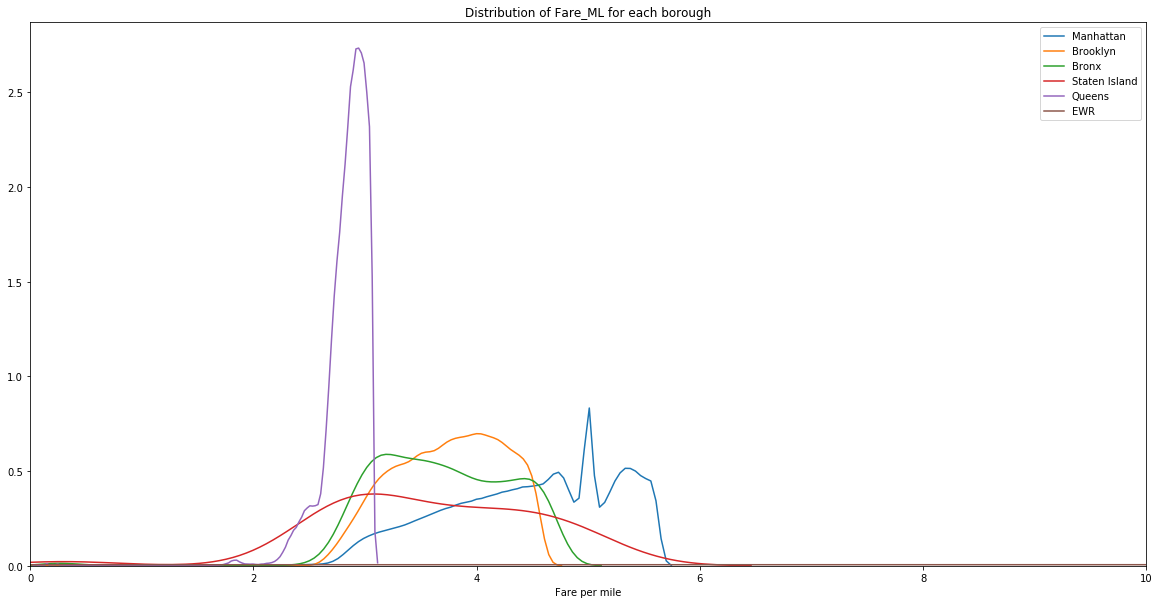

In [123]:
#february
crq1_1(df2)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value 223.16772194316047
p-value 0.0
2. Mahattan and Queens
t-value 1106.310633373098
p-value 0.0
3. Mahattan and Bronx
t-value 81.3552975219643
p-value 0.0
4. Mahattan and Staten Island
t-value 14.459876238024329
p-value 2.1777275929078837e-47
5. Mahattan and Ewr
t-value -479.3923025578749
p-value 0.0
6. Brooklyn and Queens
t-value 664.2698202123389
p-value 0.0
7. Brooklyn and Bronx
t-value 25.829309478057475
p-value 2.4742841858225363e-146
8. Brooklyn and Staten Island
t-value 11.77561515053357
p-value 5.673248625553981e-32
9. Brooklyn and EWR
t-value -125.94144215377139
p-value 0.0
10. Queens and Bronx
t-value -200.81503848981606
p-value 0.0
11. Queens and staten Island
t-value -1.0258425199579901
p-value 0.30496675579390214
12. Queens and Ewr
t-value -276.71087886973527
p-value 0.0
13. Bronx and Staten Island
t-value 8.67524923006286
p-value 5.6410154034065826e-18
14. Bronx and Ewr
t-value -36.0057922675672

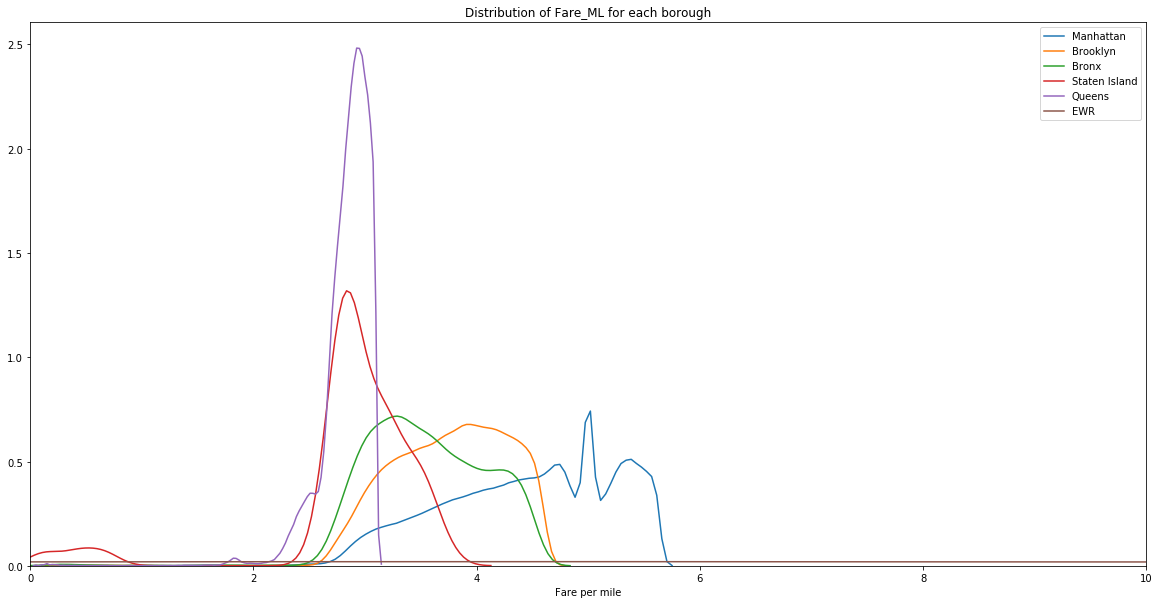

In [118]:
#March
crq1_1(df3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value 237.30373444464774
p-value 0.0
2. Mahattan and Queens
t-value 1126.4942560206687
p-value 0.0
3. Mahattan and Bronx
t-value 92.9742018796775
p-value 0.0
4. Mahattan and Staten Island
t-value 13.665248755897698
p-value 1.641003150328277e-42
5. Mahattan and Ewr
t-value -320.05470581634376
p-value 0.0
6. Brooklyn and Queens
t-value 647.8841595879508
p-value 0.0
7. Brooklyn and Bronx
t-value 35.47671191700251
p-value 6.625265263157705e-273
8. Brooklyn and Staten Island
t-value 11.180058943707586
p-value 5.475550849938141e-29
9. Brooklyn and EWR
t-value -112.7068630214695
p-value 0.0
10. Queens and Bronx
t-value -177.07584343722093
p-value 0.0
11. Queens and staten Island
t-value 0.20160300102390485
p-value 0.8402272475146013
12. Queens and Ewr
t-value -256.94326552549927
p-value 0.0
13. Bronx and Staten Island
t-value 8.259135123704304
p-value 1.8808018708443518e-16
14. Bronx and Ewr
t-value -33.63523326533657

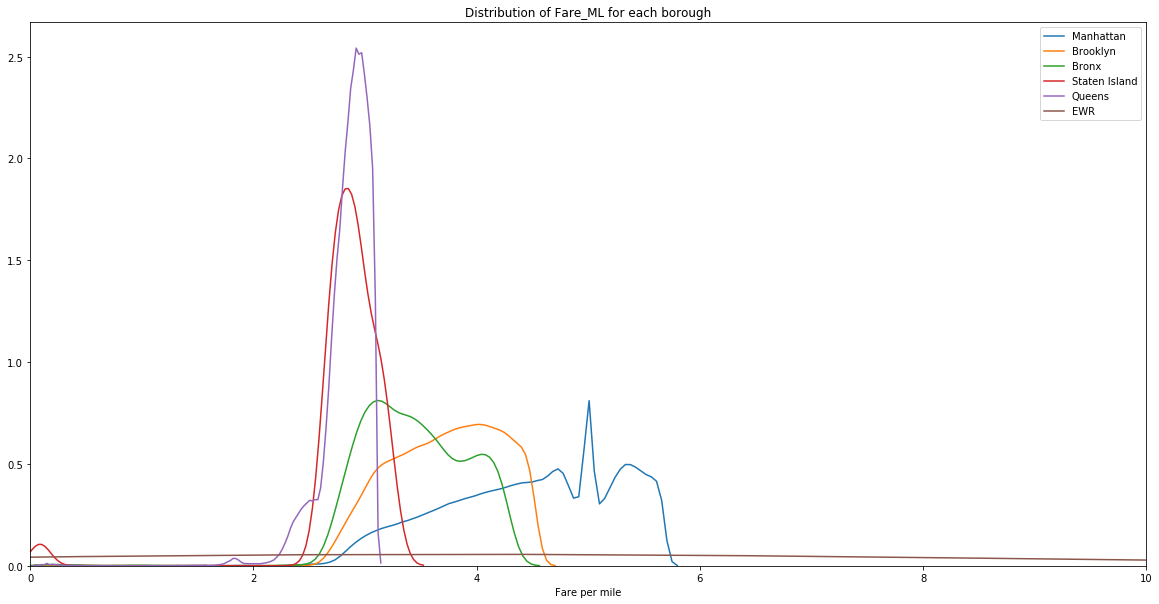

In [119]:
#April
crq1_1(df4)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value 242.5178226297642
p-value 0.0
2. Mahattan and Queens
t-value 1107.2604825780672
p-value 0.0
3. Mahattan and Bronx
t-value 97.17923066150094
p-value 0.0
4. Mahattan and Staten Island
t-value 13.106160163170848
p-value 3.041533594397051e-39
5. Mahattan and Ewr
t-value -770.9541359652419
p-value 0.0
6. Brooklyn and Queens
t-value 625.1816312346658
p-value 0.0
7. Brooklyn and Bronx
t-value 40.54471180003034
p-value 0.0
8. Brooklyn and Staten Island
t-value 8.95918349092829
p-value 3.365003133732577e-19
9. Brooklyn and EWR
t-value -139.24997472524595
p-value 0.0
10. Queens and Bronx
t-value -157.45390829357507
p-value 0.0
11. Queens and staten Island
t-value -7.34287434880941
p-value 2.0960816599962942e-13
12. Queens and Ewr
t-value -311.8135904339358
p-value 0.0
13. Bronx and Staten Island
t-value 5.007826715343208
p-value 5.696290833598681e-07
14. Bronx and Ewr
t-value -40.692180695434736
p-value 0.0
15. Sta

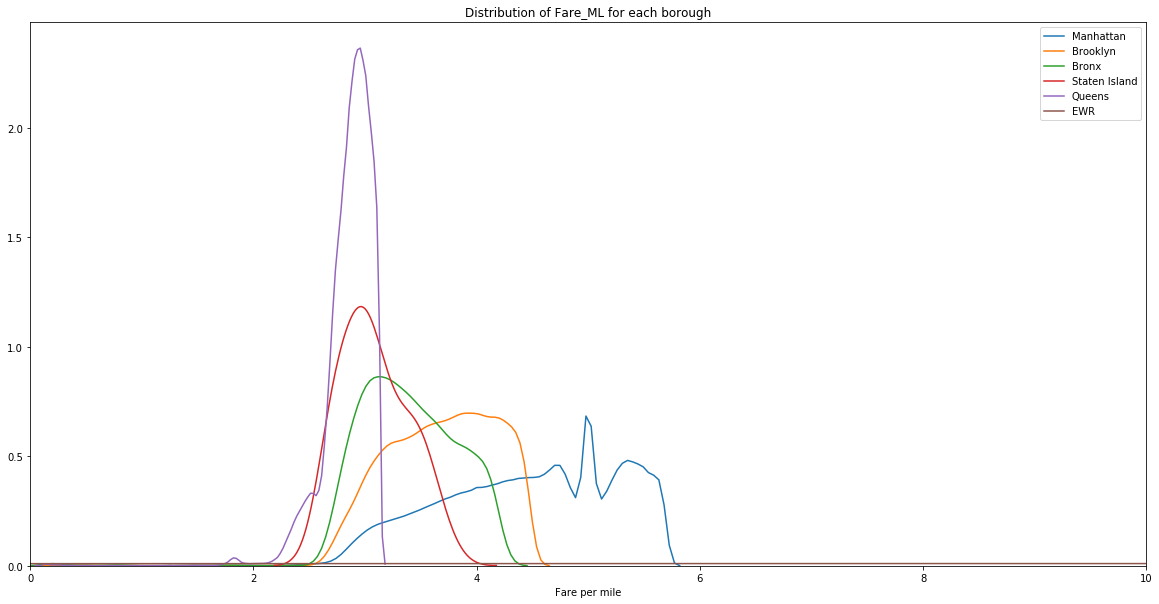

In [120]:
#May
crq1_1(df5)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value 242.3262748917645
p-value 0.0
2. Mahattan and Queens
t-value 1079.158125275543
p-value 0.0
3. Mahattan and Bronx
t-value 96.08787200721024
p-value 0.0
4. Mahattan and Staten Island
t-value 14.848552062500557
p-value 7.131936125105295e-50
5. Mahattan and Ewr
t-value -684.6810918216935
p-value 0.0
6. Brooklyn and Queens
t-value 606.7348386447413
p-value 0.0
7. Brooklyn and Bronx
t-value 42.11186548888911
p-value 0.0
8. Brooklyn and Staten Island
t-value 11.594555884052006
p-value 4.7548400724124195e-31
9. Brooklyn and EWR
t-value -133.44166489832932
p-value 0.0
10. Queens and Bronx
t-value -143.3164767926916
p-value 0.0
11. Queens and staten Island
t-value -1.7033176286961238
p-value 0.08850980284838858
12. Queens and Ewr
t-value -291.45072776383694
p-value 0.0
13. Bronx and Staten Island
t-value 7.910761184076252
p-value 3.17796320115835e-15
14. Bronx and Ewr
t-value -37.913311563756494
p-value 1.904348220

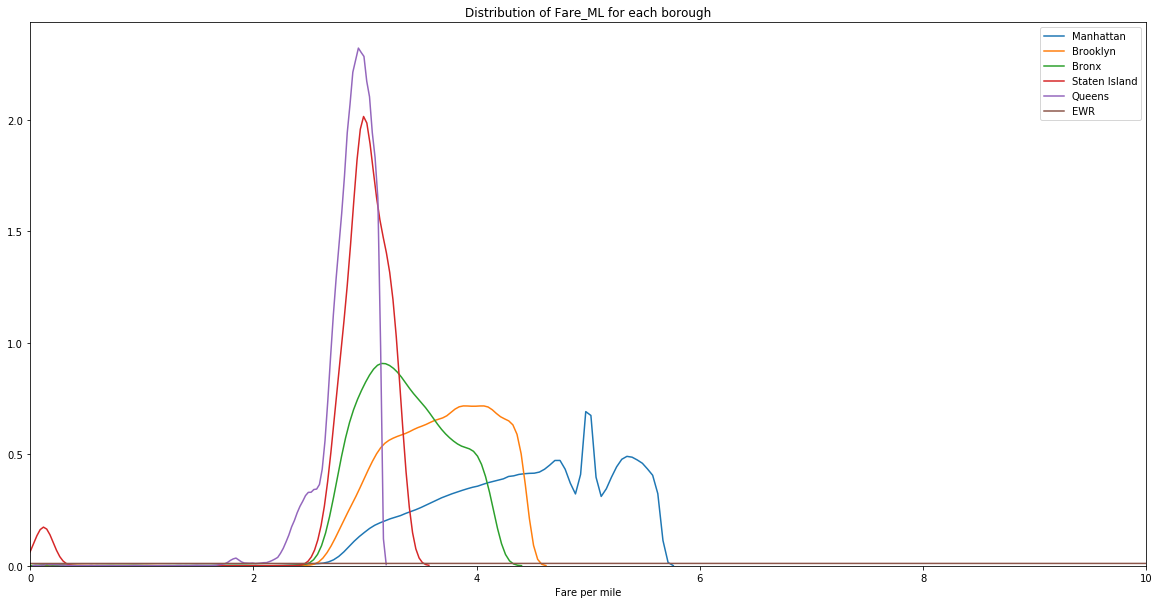

In [121]:
#June
crq1_1(df6)

In [135]:
def crq1_2(df):
    ManhattanDf = df[df['Borough'] == 'Manhattan']
    BrooklynDf = df[df['Borough'] == 'Brooklyn']
    QueensDf = df[df['Borough'] == 'Queens']
    BronxDf = df[df['Borough'] == 'Bronx']
    StatenDf = df[df['Borough'] == 'Staten Island']
    EwrDf = df[df['Borough'] == 'EWR']
    
    
    ManhattanDf["Fare_ML"] = ManhattanDf["fare_amount"]/ManhattanDf["trip_distance"]
    BrooklynDf["Fare_ML"] = BrooklynDf["fare_amount"]/BrooklynDf["trip_distance"]
    QueensDf["Fare_ML"] = QueensDf["fare_amount"]/QueensDf["trip_distance"]
    BronxDf["Fare_ML"] = BronxDf["fare_amount"]/BronxDf["trip_distance"]
    StatenDf["Fare_ML"] = StatenDf["fare_amount"]/StatenDf["trip_distance"]
    EwrDf["Fare_ML"] = EwrDf["fare_amount"]/EwrDf["trip_distance"]
    
    
    
    ManhattanDf = ManhattanDf[ManhattanDf["Fare_ML"] <= ManhattanDf["Fare_ML"].quantile(0.5)]
    BrooklynDf = BrooklynDf[BrooklynDf["Fare_ML"] <= BrooklynDf["Fare_ML"].quantile(0.5)]
    QueensDf = QueensDf[QueensDf["Fare_ML"] <= QueensDf["Fare_ML"].quantile(0.5)]
    BronxDf = BronxDf[BronxDf["Fare_ML"] <= BronxDf["Fare_ML"].quantile(0.5)]
    StatenDf = StatenDf[StatenDf["Fare_ML"] <= StatenDf["Fare_ML"].quantile(0.5)]
    EwrDf = EwrDf[EwrDf["Fare_ML"] <= EwrDf["Fare_ML"].quantile(0.75)]
   
    ManhattanDf["trip_minutes"]= ManhattanDf["trip_duration"]/60
    BrooklynDf["trip_minutes"]= BrooklynDf["trip_duration"]/60
    QueensDf["trip_minutes"]= QueensDf["trip_duration"]/60
    BronxDf["trip_minutes"]= BronxDf["trip_duration"]/60
    StatenDf["trip_minutes"]= StatenDf["trip_duration"]/60
    EwrDf["trip_minutes"]= EwrDf["trip_duration"]/60

    ManhattanDf["Fare_ML_M"]= ManhattanDf["fare_amount"]/ManhattanDf["trip_minutes"]
    BrooklynDf["Fare_ML_M"]= BrooklynDf["fare_amount"]/BrooklynDf["trip_minutes"]
    QueensDf["Fare_ML_M"]= QueensDf["fare_amount"]/QueensDf["trip_minutes"]
    BronxDf["Fare_ML_M"]= BronxDf["fare_amount"]/BronxDf["trip_minutes"]
    StatenDf["Fare_ML_M"]= StatenDf["fare_amount"]/StatenDf["trip_minutes"]
    EwrDf["Fare_ML_M"]= EwrDf["fare_amount"]/EwrDf["trip_minutes"]

    #Mean for each borough for "Fare_ML_M"
    Fav2_man = ManhattanDf['Fare_ML_M'].mean()
    Fav2_brook = BrooklynDf['Fare_ML_M'].mean()
    Fav2_que = QueensDf['Fare_ML_M'].mean()
    Fav2_bronx = BronxDf['Fare_ML_M'].mean()
    Fav2_si = StatenDf['Fare_ML_M'].mean()
    Fav2_ewr = EwrDf['Fare_ML_M'].mean()


    # Standard deviation for each borough for "Fare_ML_M"
    Fsd2_man = ManhattanDf['Fare_ML_M'].std()
    Fsd2_brook = BrooklynDf['Fare_ML_M'].std()
    Fsd2_que = QueensDf['Fare_ML_M'].std()
    Fsd2_bronx = BronxDf['Fare_ML_M'].std()
    Fsd2_si = StatenDf['Fare_ML_M'].std()
    Fsd2_ewr = EwrDf['Fare_ML_M'].std()
    
    ManhattanDf = ManhattanDf[ManhattanDf.Fare_ML_M < 10]
    BrooklynDf = BrooklynDf[BrooklynDf.Fare_ML_M < 10]
    BronxDf = BronxDf[BronxDf.Fare_ML_M < 10]
    QueensDf = QueensDf[QueensDf.Fare_ML_M < 10]
    StatenDf = StatenDf[StatenDf.Fare_ML_M < 10]
    EwrDf = EwrDf[EwrDf.Fare_ML_M < 10]


    plt.figure(figsize = (20,10))
    sns.kdeplot(ManhattanDf["Fare_ML_M"], label = "Manhattan")
    sns.kdeplot(BrooklynDf["Fare_ML_M"], label = "Brooklyn")
    sns.kdeplot(BronxDf["Fare_ML_M"], label = "Bronx")
    sns.kdeplot(StatenDf["Fare_ML_M"], label = "Staten Island")
    sns.kdeplot(QueensDf["Fare_ML_M"], label = "Queens")
    sns.kdeplot(EwrDf["Fare_ML_M"], label = "EWR")


    plt.title("Distribution of Fare_ML_M for each borough in January")
    plt.xlabel("Fare per mile weight with duration in minutes")
    


     
    print("T- Test for all possible pairs among the boroughs")

    print("1. Manhattan & Brooklyn")
    a = np.array(ManhattanDf.Fare_ML_M, dtype=pd.Series) 
    b = np.array(BrooklynDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)

    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("2. Mahattan and Queens")
    a = np.array(ManhattanDf.Fare_ML_M, dtype=pd.Series) 
    b = np.array(QueensDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("3. Mahattan and Bronx")
    a = np.array(ManhattanDf.Fare_ML_M, dtype=pd.Series) 
    b = np.array(BronxDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("4. Mahattan and Staten Island")
    a = np.array(ManhattanDf.Fare_ML_M, dtype=pd.Series) 
    b = np.array(StatenDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("5. Mahattan and Ewr")
    a = np.array(ManhattanDf.Fare_ML_M, dtype=pd.Series) 
    b = np.array(EwrDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("6. Brooklyn and Queens")
    a = np.array(BrooklynDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(QueensDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("7. Brooklyn and Bronx")
    a = np.array(BrooklynDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(BronxDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("8. Brooklyn and Staten Island")
    a = np.array(BrooklynDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("9. Brooklyn and EWR")
    a = np.array(BrooklynDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("10. Queens and Bronx")
    a = np.array(QueensDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(BronxDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("11. Queens and staten Island")
    a = np.array(QueensDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("12. Queens and Ewr")
    a = np.array(QueensDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("13. Bronx and Staten Island")
    a = np.array(BronxDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(StatenDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("14. Bronx and Ewr")
    a = np.array(BronxDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value

    print("15. Staten Island and Ewr")
    a = np.array(StatenDf.Fare_ML_M, dtype=pd.Series)
    b = np.array(EwrDf.Fare_ML_M, dtype=pd.Series)
    t, value = stats.ttest_ind(a,b)
    print("t-value", t) #t-value
    print("p-value", value) #p value



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value -55.021000345541914
p-value 0.0
2. Mahattan and Queens
t-value -641.024533028007
p-value 0.0
3. Mahattan and Bronx
t-value -30.275258637435382
p-value 2.569198195668711e-201
4. Mahattan and Staten Island
t-value -6.9840051396999465
p-value 2.869295592502976e-12
5. Mahattan and Ewr
t-value -35.25378149073527
p-value 3.3332340355141516e-272
6. Brooklyn and Queens
t-value -170.4656083956578
p-value 0.0
7. Brooklyn and Bronx
t-value -13.813361217065921
p-value 2.570754005182691e-43
8. Brooklyn and Staten Island
t-value -4.9223851046247145
p-value 8.580096051970499e-07
9. Brooklyn and EWR
t-value -30.161635704532124
p-value 7.478724409831283e-198
10. Queens and Bronx
t-value 32.717266567783454
p-value 3.1367715223390207e-234
11. Queens and staten Island
t-value 0.9916637625982926
p-value 0.32136264567494255
12. Queens and Ewr
t-value -20.499753889953684
p-value 2.637493269136552e-93
13. Bronx and Staten Island

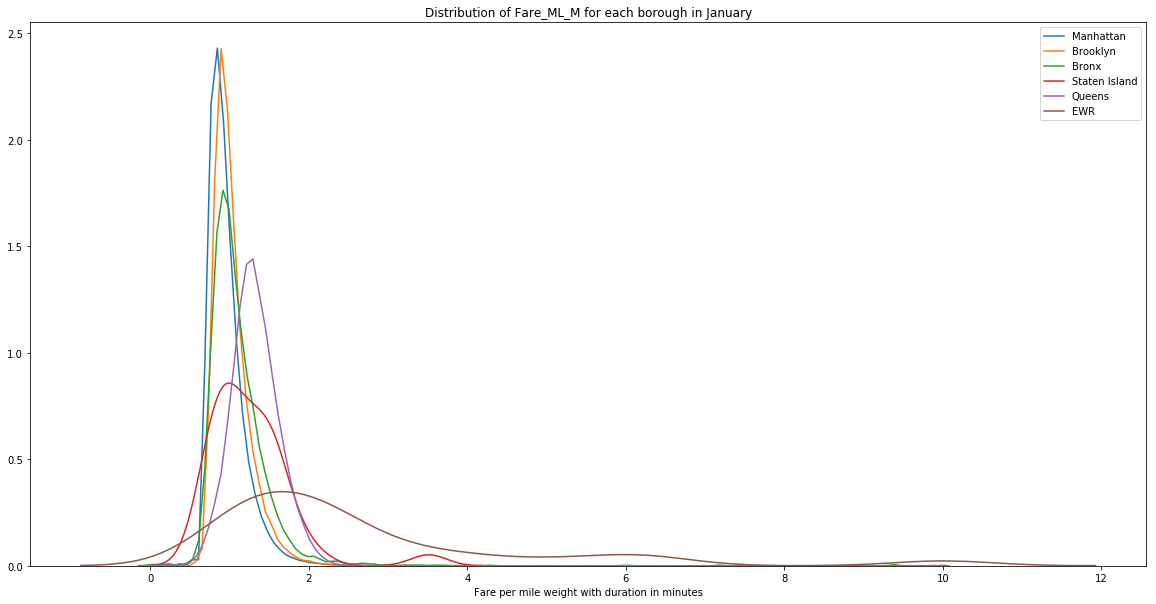

In [130]:
#feb
crq1_2(df2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value -49.039429255198286
p-value 0.0
2. Mahattan and Queens
t-value -558.9670739807159
p-value 0.0
3. Mahattan and Bronx
t-value -28.51517663330045
p-value 7.908806116488253e-179
4. Mahattan and Staten Island
t-value -7.529453769491919
p-value 5.096335406848551e-14
5. Mahattan and Ewr
t-value -26.920292441445532
p-value 1.31259540334478e-159
6. Brooklyn and Queens
t-value -149.05138769826527
p-value 0.0
7. Brooklyn and Bronx
t-value -11.780203377175306
p-value 5.34164992377452e-32
8. Brooklyn and Staten Island
t-value -5.240976118078168
p-value 1.6029200114481253e-07
9. Brooklyn and EWR
t-value -21.739615246299554
p-value 2.2861145309162562e-104
10. Queens and Bronx
t-value 34.248246518890056
p-value 1.6598439181672807e-256
11. Queens and staten Island
t-value 0.09510808933711501
p-value 0.9242290448474044
12. Queens and Ewr
t-value -14.158468373777717
p-value 1.7203075966261056e-45
13. Bronx and Staten Island

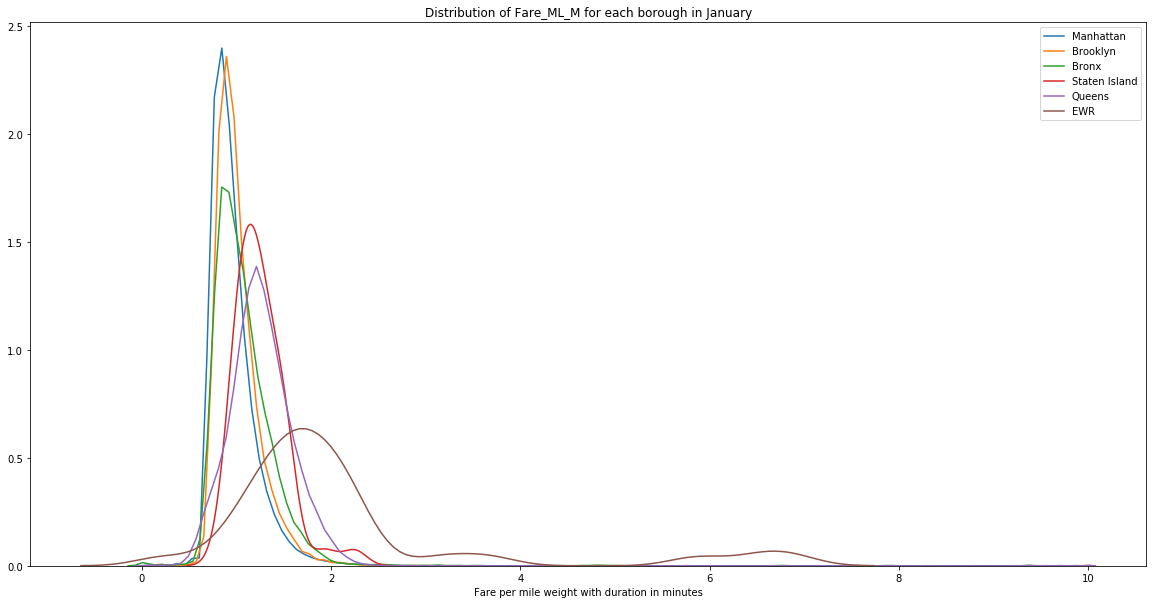

In [131]:
#march
crq1_2(df3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value -57.60633642999464
p-value 0.0
2. Mahattan and Queens
t-value -591.880697549622
p-value 0.0
3. Mahattan and Bronx
t-value -34.55188882089351
p-value 1.4582920529585847e-261
4. Mahattan and Staten Island
t-value -12.325448216903087
p-value 6.61706617235564e-35
5. Mahattan and Ewr
t-value -32.76880273428332
p-value 1.7603283510637005e-235
6. Brooklyn and Queens
t-value -151.62518715703095
p-value 0.0
7. Brooklyn and Bronx
t-value -14.358081089714652
p-value 1.1294766950152847e-46
8. Brooklyn and Staten Island
t-value -9.151370046157863
p-value 5.802923661216858e-20
9. Brooklyn and EWR
t-value -26.358213010370815
p-value 3.4603214026465505e-152
10. Queens and Bronx
t-value 33.925736319716854
p-value 9.06206775094961e-252
11. Queens and staten Island
t-value -3.442683872773971
p-value 0.0005760577086142311
12. Queens and Ewr
t-value -18.434874477144582
p-value 7.664419032725303e-76
13. Bronx and Staten Island

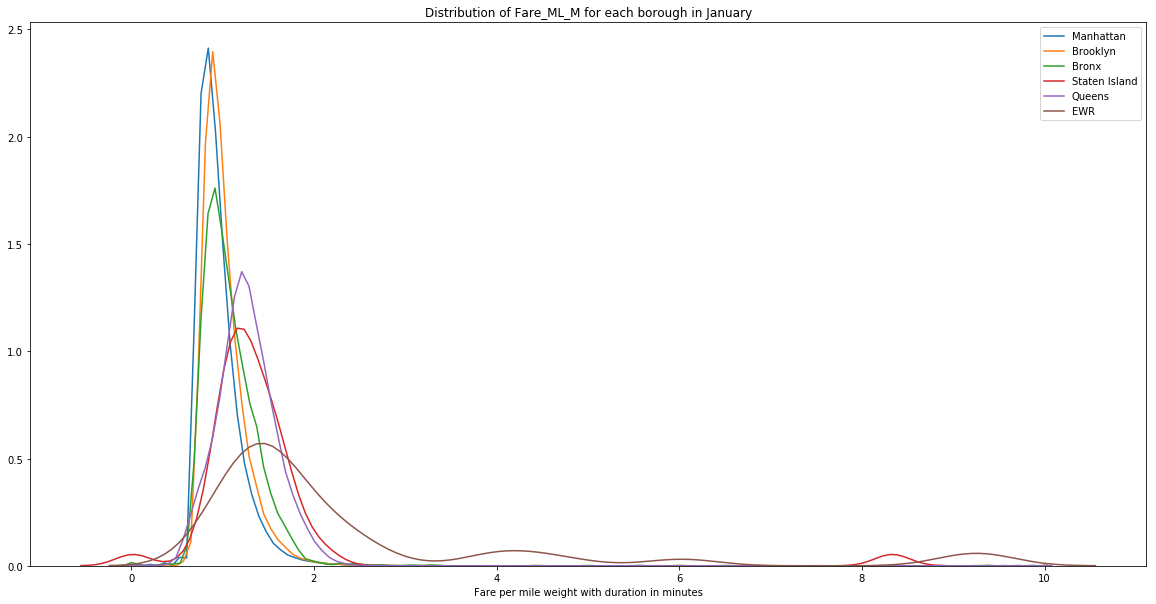

In [136]:
#april
crq1_2(df4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value -57.649580940332164
p-value 0.0
2. Mahattan and Queens
t-value -528.2961174233305
p-value 0.0
3. Mahattan and Bronx
t-value -35.15842151572254
p-value 9.513977873838478e-271
4. Mahattan and Staten Island
t-value -5.373776259784988
p-value 7.710883726709151e-08
5. Mahattan and Ewr
t-value -39.21843592873031
p-value 0.0
6. Brooklyn and Queens
t-value -129.44352095854634
p-value 0.0
7. Brooklyn and Bronx
t-value -15.243995260675199
p-value 2.2407208921181546e-52
8. Brooklyn and Staten Island
t-value -3.220339447282217
p-value 0.0012810943077045727
9. Brooklyn and EWR
t-value -33.1715614676999
p-value 4.85271975293825e-239
10. Queens and Bronx
t-value 26.761779540717825
p-value 1.4036892094705435e-157
11. Queens and staten Island
t-value 1.686058503210777
p-value 0.09178562837381121
12. Queens and Ewr
t-value -22.446412695012874
p-value 1.7351209396632075e-111
13. Bronx and Staten Island
t-value -1.0713540693

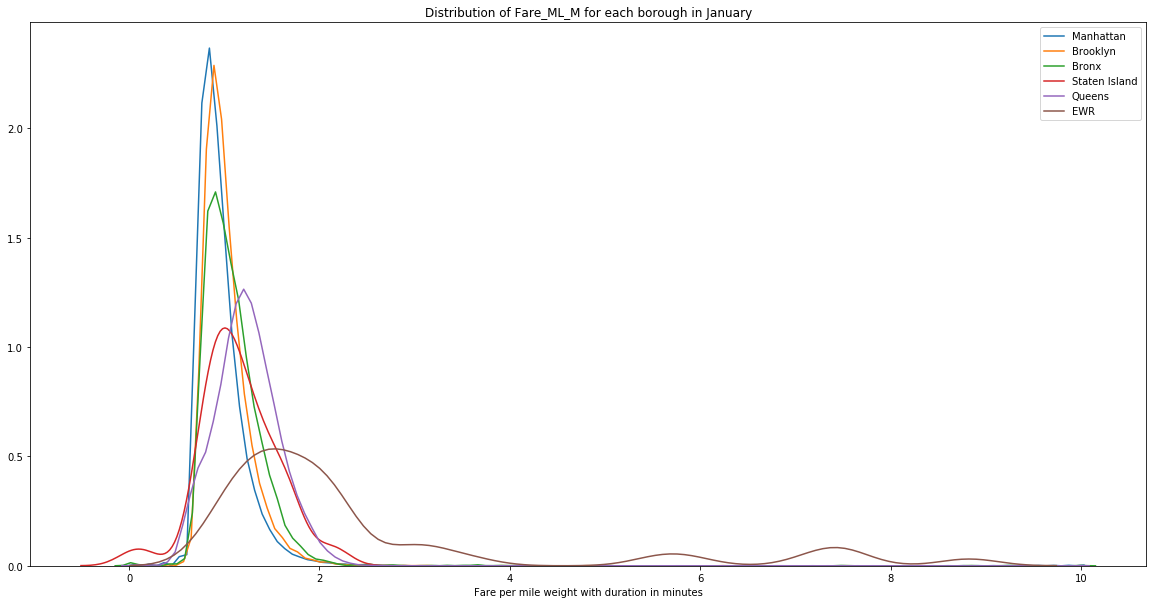

In [137]:
#may
crq1_2(df5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

T- Test for all possible pairs among the boroughs
1. Manhattan & Brooklyn
t-value -56.14871629284703
p-value 0.0
2. Mahattan and Queens
t-value -458.35704561547584
p-value 0.0
3. Mahattan and Bronx
t-value -34.14687658424571
p-value 1.6284331709561744e-255
4. Mahattan and Staten Island
t-value -7.3691611624844215
p-value 1.7173985079676438e-13
5. Mahattan and Ewr
t-value -30.508859949588857
p-value 2.1061633277536436e-204
6. Brooklyn and Queens
t-value -113.93764957556726
p-value 0.0
7. Brooklyn and Bronx
t-value -14.472585594048006
p-value 2.1582370303055726e-47
8. Brooklyn and Staten Island
t-value -4.750754184125654
p-value 2.0314852946737594e-06
9. Brooklyn and EWR
t-value -24.133696243788417
p-value 4.829758356499014e-128
10. Queens and Bronx
t-value 21.216905304022692
p-value 8.037182579355332e-100
11. Queens and staten Island
t-value -0.45202249690218194
p-value 0.651253142250193
12. Queens and Ewr
t-value -18.023430687535708
p-value 1.4088182722111525e-72
13. Bronx and Staten I

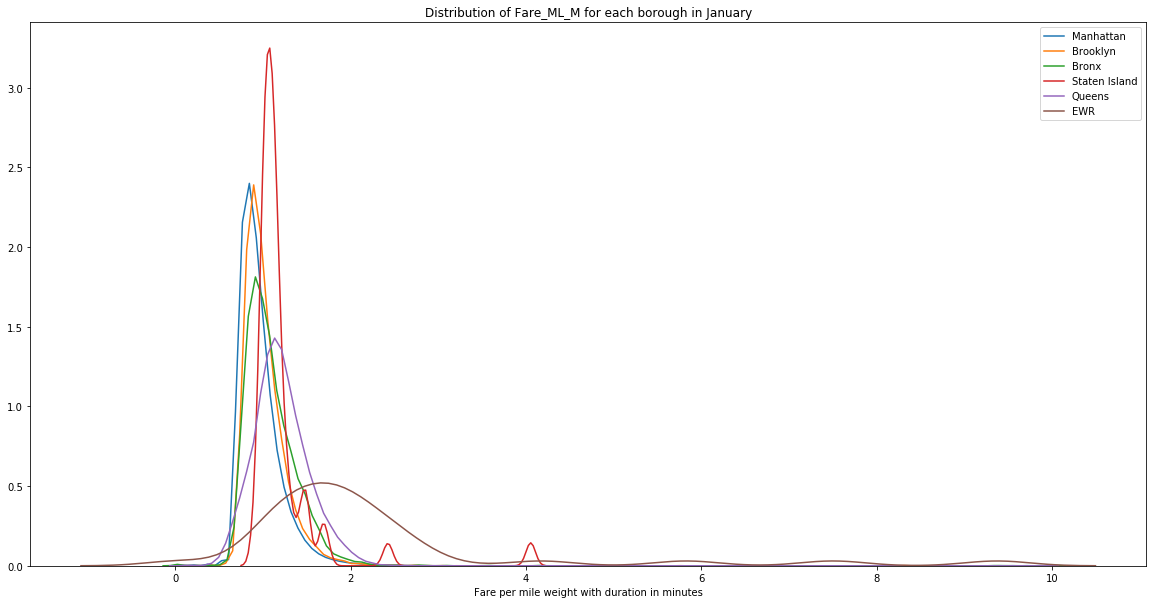

In [138]:
#june
crq1_2(df6)

# CRQ2

In [139]:
# Pick up
Jan_PickupGroup = df1.groupby('PULocationID').PULocationID.count()
Feb_PickupGroup = df2.groupby('PULocationID').PULocationID.count()
Mar_PickupGroup = df3.groupby('PULocationID').PULocationID.count()
April_PickupGroup = df4.groupby('PULocationID').PULocationID.count()
May_PickupGroup = df5.groupby('PULocationID').PULocationID.count()
June_PickupGroup = df6.groupby('PULocationID').PULocationID.count()

Jan_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
Feb_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
Mar_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
April_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
May_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
June_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])

for i in range(1,266):
    if(i in Jan_PickupGroup.keys()):
        Jan_count['count'][i] = Jan_PickupGroup.at[i]
    else:
        Jan_count['count'][i] = 0
    if(i in Feb_PickupGroup.keys()):
        Feb_count['count'][i] = Feb_PickupGroup.at[i]
    else:
        Feb_count['count'][i] = 0
    if(i in Mar_PickupGroup.keys()):
        Mar_count['count'][i] = Mar_PickupGroup.at[i]
    else:
        Mar_count['count'][i] = 0
    if(i in April_PickupGroup.keys()):
        April_count['count'][i] = April_PickupGroup.at[i]
    else:
        April_count['count'][i] = 0
    if(i in May_PickupGroup.keys()):
        May_count['count'][i] = May_PickupGroup.at[i]
    else:
        May_count['count'][i] = 0
    if(i in June_PickupGroup.keys()):
        June_count['count'][i] = June_PickupGroup.at[i]
    else:
        June_count['count'][i] = 0

JanPU_count= Jan_count['count']        
FebPU_count= Feb_count['count'] 
MarPU_count= Mar_count['count'] 
AprilPU_count= April_count['count'] 
MayPU_count= May_count['count']
JunePU_count= June_count['count']

#Now PickUp count for All months
TotalCount_PU = JanPU_count.add(FebPU_count)
TotalCount_PU = TotalCount_PU.add(MarPU_count)
TotalCount_PU = TotalCount_PU.add(AprilPU_count)
TotalCount_PU = TotalCount_PU.add(MayPU_count)
TotalCount_PU = TotalCount_PU.add(JunePU_count)

del Jan_PickupGroup
del Feb_PickupGroup
del Mar_PickupGroup
del April_PickupGroup
del May_PickupGroup
del June_PickupGroup


del Jan_count
del Feb_count
del Mar_count
del April_count
del May_count
del June_count


newyork_json = os.path.join('/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/taxi_zones.json')
m_pickup = folium.Map(location=[40.7648, -73.9808],zoom_start=12)
geo_newyork = json.load(open(newyork_json))

m_pickup.choropleth(
 geo_data=geo_newyork,
 name='Same Pickup',
 data=TotalCount_PU ,
 key_on='feature.properties.LocationID',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Pickup Location'
)

In [140]:
m_pickup.save("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/pickup.html")

In [141]:
# drop off
Jan_DropoffGroup = df1.groupby('DOLocationID').DOLocationID.count()
Feb_DropoffGroup = df2.groupby('DOLocationID').DOLocationID.count()
Mar_DropoffGroup = df3.groupby('DOLocationID').DOLocationID.count()
April_DropoffGroup = df4.groupby('DOLocationID').DOLocationID.count()
May_DropoffGroup = df5.groupby('DOLocationID').DOLocationID.count()
June_DropoffGroup = df6.groupby('DOLocationID').DOLocationID.count()

Jan_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
Feb_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
Mar_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
April_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
May_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])
June_count = pd.DataFrame(index=list(range(1,266)), columns=['count'])

for i in range(1,266):
    if(i in Jan_DropoffGroup.keys()):
        Jan_count['count'][i] = Jan_DropoffGroup.at[i]
    else:
        Jan_count['count'][i] = 0
    if(i in Feb_DropoffGroup.keys()):
        Feb_count['count'][i] = Feb_DropoffGroup.at[i]
    else:
        Feb_count['count'][i] = 0
    if(i in Mar_DropoffGroup.keys()):
        Mar_count['count'][i] = Mar_DropoffGroup.at[i]
    else:
        Mar_count['count'][i] = 0
    if(i in April_DropoffGroup.keys()):
        April_count['count'][i] = April_DropoffGroup.at[i]
    else:
        April_count['count'][i] = 0
    if(i in May_DropoffGroup.keys()):
        May_count['count'][i] = May_DropoffGroup.at[i]
    else:
        May_count['count'][i] = 0
    if(i in June_DropoffGroup.keys()):
        June_count['count'][i] = June_DropoffGroup.at[i]
    else:
        June_count['count'][i] = 0

JanDO_count= Jan_count['count']        
FebDO_count= Feb_count['count'] 
MarDO_count= Mar_count['count'] 
AprilDO_count= April_count['count'] 
MayDO_count= May_count['count'] 
JuneDO_count= June_count['count'] 

#Now PickUp count for All months
TotalCount_DO = JanDO_count.add(FebDO_count)
TotalCount_DO = TotalCount_DO.add(MarDO_count)
TotalCount_DO = TotalCount_DO.add(AprilDO_count)
TotalCount_DO = TotalCount_DO.add(MayDO_count)
TotalCount_DO = TotalCount_DO.add(JuneDO_count)

del Jan_DropoffGroup
del Feb_DropoffGroup
del Mar_DropoffGroup
del April_DropoffGroup
del May_DropoffGroup
del June_DropoffGroup


del Jan_count
del Feb_count
del Mar_count
del April_count
del May_count
del June_count

newyork_json = os.path.join('/Users/milpro/Desktop/Universita/ADM_Aris/HW2/Yellow/taxi_zones.json')
m_dropoff = folium.Map(location=[40.7648, -73.9808],zoom_start=12)
geo_newyork = json.load(open(newyork_json))

m_dropoff.choropleth(
 geo_data=geo_newyork,
 name='Same Dropoff',
 data=TotalCount_DO ,
 key_on='feature.properties.LocationID',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Dropoff Location'
)

In [142]:
m_dropoff.save("/Users/milpro/Desktop/Universita/ADM_Aris/HW2/dropoff.html")

We can conclude our analysis, looking at the pick up and drop off of the choropleth maps, that yellow cabs run exclusively in Manhattan as we have already said at the beginning of our project.